### Importing necessary Libraries 

In [1]:
import numpy as np
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
sns.set(style="white",font_scale=1.5)
sns.set(rc={"axes.facecolor":"#FFFAF0","figure.facecolor":"#FFFAF0"})
sns.set_context("poster",font_scale = .7)
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r"C:\Users\sajee\OneDrive\Desktop\WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
data.shape

(1470, 35)

### We have 35 variables affecting the attrition

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
column_data_types = data.dtypes
numerical_count = 0
categorical_count = 0

for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1
print(f"There are {numerical_count} Numerical Columns in dataset")
print(f"There are {categorical_count} Categorical Columns in dataset")

There are 26 Numerical Columns in dataset
There are 9 Categorical Columns in dataset


In [6]:
data.select_dtypes(np.number).sample(5)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
95,54,1217,2,4,1,126,1,60,3,3,3,13549,24001,9,12,3,1,80,1,16,5,1,4,3,0,3
1174,25,772,2,1,1,1653,4,77,4,2,3,5206,4973,1,17,3,3,80,2,7,6,3,7,7,0,7
808,29,1107,28,4,1,1120,3,93,3,1,4,2514,26968,4,22,4,1,80,1,11,1,3,7,5,1,7
1359,34,735,3,1,1,1915,4,75,2,2,4,8103,16495,3,12,3,3,80,0,9,3,2,4,2,0,1
639,49,1418,1,3,1,887,3,36,3,1,1,3580,10554,2,16,3,2,80,1,7,2,3,4,2,0,2


### givin labels to categorical values so as for better visualization 

In [7]:
data["EnvironmentSatisfaction"] = data["EnvironmentSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
data["JobInvolvement"] = data["JobInvolvement"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
data["JobSatisfaction"] = data["JobSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
data["PerformanceRating"] = data["PerformanceRating"].replace({1:"Low",2:"Good",3:"Excellent",4:"Outstanding"})
data["RelationshipSatisfaction"] = data["RelationshipSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})
data["WorkLifeBalance"] = data["WorkLifeBalance"].replace({1:"Bad",2:"Good",3:"Better",4:"Best"})
data["Education"] = data["Education"].replace({1:"Below College",2:"College",3:"Bachelor",4:"Master",5:"Doctor"})
data["JobLevel"] = data["JobLevel"].replace({1:"Entry Level",2:"Junior Level",3:"Mid Level",
                                           4:"Senior Level",5:"Executive Level"})

In [8]:
data.select_dtypes(include='O').sample(5)

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
794,No,Travel_Frequently,Research & Development,Below College,Life Sciences,Low,Male,High,Junior Level,Healthcare Representative,Very High,Single,Y,No,Excellent,High,Good
172,No,Travel_Frequently,Research & Development,College,Medical,Very High,Male,High,Entry Level,Laboratory Technician,Medium,Single,Y,No,Excellent,High,Good
1361,No,Travel_Frequently,Research & Development,Bachelor,Other,High,Male,Very High,Entry Level,Laboratory Technician,Very High,Married,Y,No,Excellent,Low,Better
963,No,Travel_Rarely,Sales,College,Life Sciences,Medium,Female,High,Junior Level,Sales Executive,Low,Divorced,Y,No,Excellent,Very High,Better
73,No,Travel_Rarely,Research & Development,Bachelor,Life Sciences,Medium,Male,High,Junior Level,Research Scientist,Medium,Married,Y,No,Excellent,Medium,Better


In [9]:
print("Duplicates in Dataset: ",data.duplicated().sum())

Duplicates in Dataset:  0


### We have no duplicate entries in our dataset

In [10]:
missing_data = data.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(data))*100,2)
missing_data

,Total No. of Missing Values,% of Missing Values
Age,0,0.0
Attrition,0,0.0
BusinessTravel,0,0.0
DailyRate,0,0.0
Department,0,0.0
DistanceFromHome,0,0.0
Education,0,0.0
EducationField,0,0.0
EmployeeCount,0,0.0
EmployeeNumber,0,0.0


### Also no null values are present in our dataset 

In [11]:
round(data.describe().T,2)  

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.92,9.14,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.49,403.51,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.19,8.11,1.0,2.00,7.0,14.00,29.0
EmployeeCount,1470.0,1.00,0.00,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.87,602.02,1.0,491.25,1020.5,1555.75,2068.0
HourlyRate,1470.0,65.89,20.33,30.0,48.00,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.93,4707.96,1009.0,2911.00,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.10,7117.79,2094.0,8047.00,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.69,2.50,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.21,3.66,11.0,12.00,14.0,18.00,25.0


### Observation- 
#### 1. Stanard Deviation value of EmployeeCount and StandardHours is 0.00. Which conveys that all values present in this attribute are same.
#### 2.EmployeeNumber represents a unique value to each of the employees, which will not provide any meaningful inisghts.
#### 3.The Minimum Age is 18 which conveys that All employees are Adult

In [12]:
### Dropping irrelevant columns
cols = ["Over18", "EmployeeCount", "EmployeeNumber", "StandardHours"]
data.drop(columns=cols, inplace=True)

In [13]:
data.describe(include="O").T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
Education,1470,5,Bachelor,572
EducationField,1470,6,Life Sciences,606
EnvironmentSatisfaction,1470,4,High,453
Gender,1470,2,Male,882
JobInvolvement,1470,4,High,868
JobLevel,1470,5,Entry Level,543
JobRole,1470,9,Sales Executive,326


In [14]:
###Cecking for unique values in eac column
cat_cols = data.select_dtypes(include="O").columns

for column in cat_cols:
    print('Unique values of ', column, set(data[column]))
    print("-"*121)

Unique values of  Attrition {'Yes', 'No'}
-------------------------------------------------------------------------------------------------------------------------
Unique values of  BusinessTravel {'Travel_Frequently', 'Travel_Rarely', 'Non-Travel'}
-------------------------------------------------------------------------------------------------------------------------
Unique values of  Department {'Research & Development', 'Sales', 'Human Resources'}
-------------------------------------------------------------------------------------------------------------------------
Unique values of  Education {'Bachelor', 'Doctor', 'Below College', 'College', 'Master'}
-------------------------------------------------------------------------------------------------------------------------
Unique values of  EducationField {'Marketing', 'Technical Degree', 'Life Sciences', 'Medical', 'Human Resources', 'Other'}
----------------------------------------------------------------------------------------

### Exploratory Data Analysis

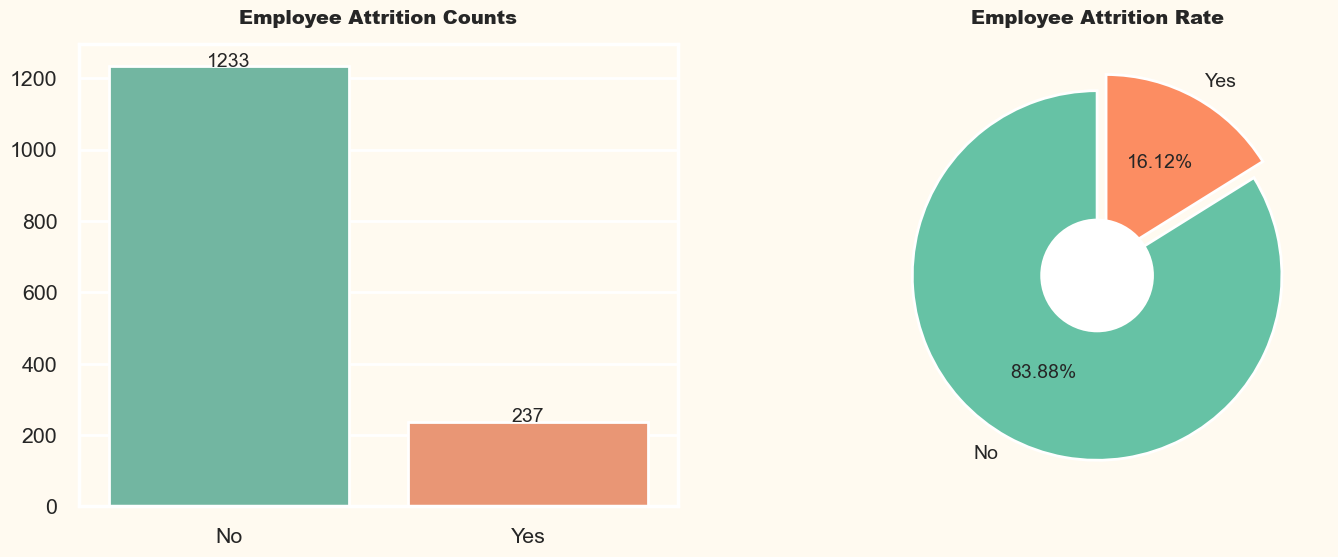

In [15]:
##Visualization to show Employee Attrition in Counts.
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate = data["Attrition"].value_counts()
sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette= 'Set2')
plt.title("Employee Attrition Counts",fontweight="black", size=14, pad=15)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontsize=14)

##Visualization to show Employee Attrition in Percentage.
plt.subplot(1,2,2)
colors = sns.color_palette('Set2', len(attrition_rate))
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"size":14},
        colors = colors,explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=14 ,pad=15)
plt.show()

### Observations- 
#### 1. The Employee Attrition rate of this organization is 16.12%.
#### 2.data is unbalanced

In [16]:
def pie_bar_plot(df, col, hue):
    plt.figure(figsize=(14, 6))
    
    # Extract value counts for the specified column
    value_counts = df[col].value_counts().sort_index()
    
    # First subplot: Pie chart
    plt.subplot(1, 2, 1) 
    ax1 = value_counts
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)
    colors = sns.color_palette('Set2', len(ax1))
    plt.pie(ax1.values, labels=ax1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90, 
            colors=colors, textprops={"size":14})
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    
    # Second subplot: Bar plot
    plt.subplot(1, 2, 2)
    new_df = df[df[hue] == 'Yes']
    value_1 = value_counts
    value_2 = new_df[col].value_counts().sort_index()  # Sort the values in the same order
    ax2 = np.floor((value_2 / value_1) * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, palette='Set2')
    plt.title(f"Attrition Rate by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2):
        plt.text(index, value, str(value) + " (" + str(int(ax2[index])) + "% )", ha="center", va="bottom", size=10)

    plt.tight_layout()
    plt.show()

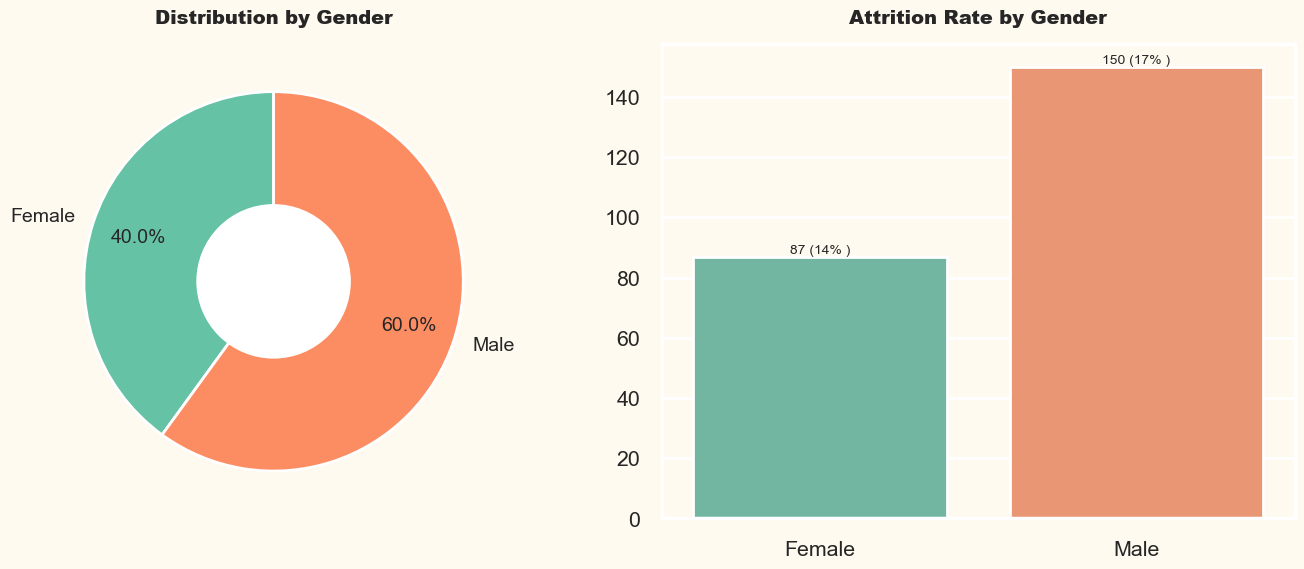

In [17]:
pie_bar_plot(data, 'Gender', 'Attrition')

### Observation-
#### 1.Male employees accounts for a higher proportion than female employees by more than 20%.
#### 2.Attrition in male employees is higher compared to female employees.

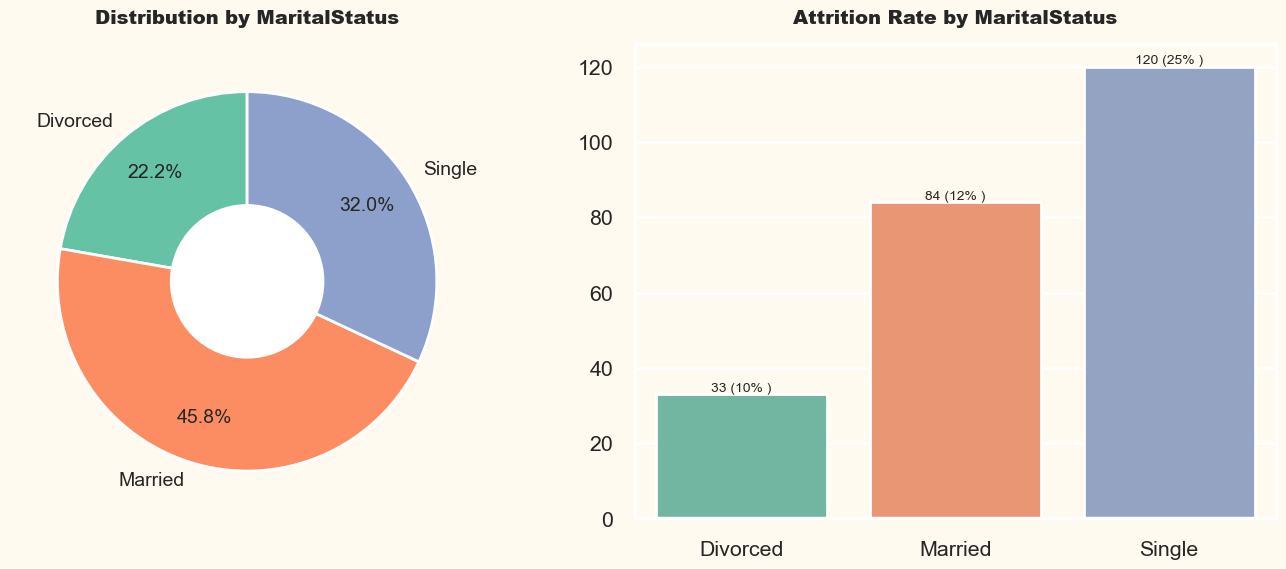

In [18]:
pie_bar_plot(data, 'MaritalStatus', 'Attrition')

### Observation-
#### 1.Most of the employees are Married in the organization.
#### 2.The attrition rate is very high of employees who are single.
#### 3.The attrition rate is low for employees who are Divorced.

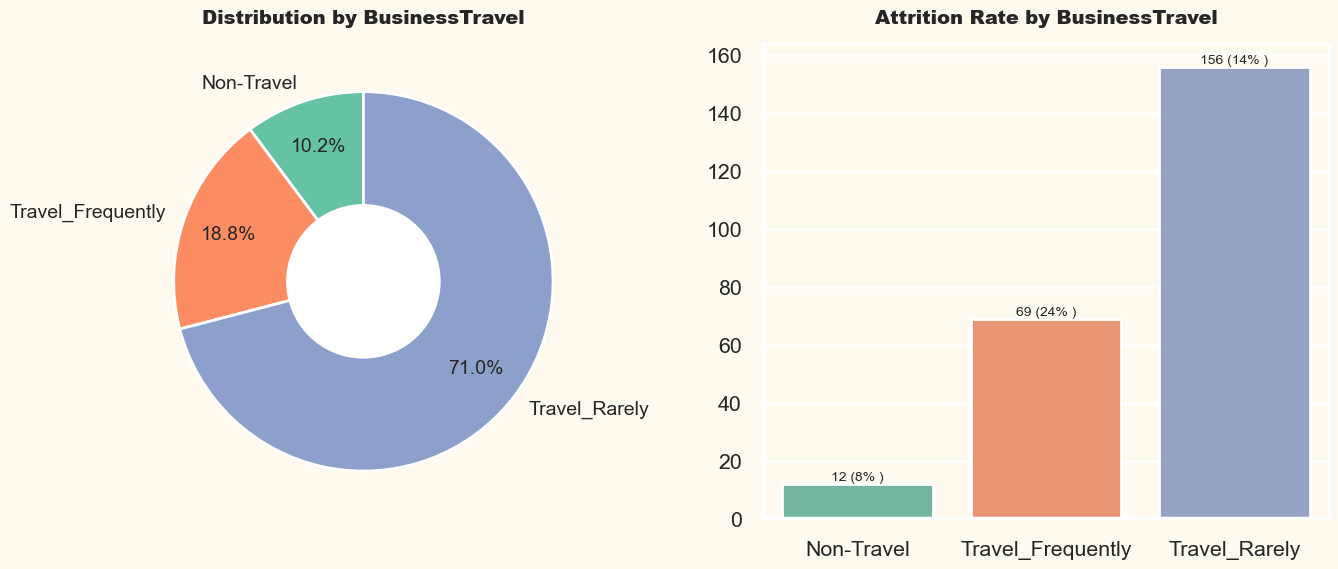

In [19]:
pie_bar_plot(data, 'BusinessTravel', 'Attrition')

### Observation-
#### 1.Most of the employees in the organization Travel Rarely.
#### 2.Highest employee attrition can be observed by those employees who Travels Frequently.
#### 3.Lowest employee attrition can be observed by those employees who are Non-Travel.

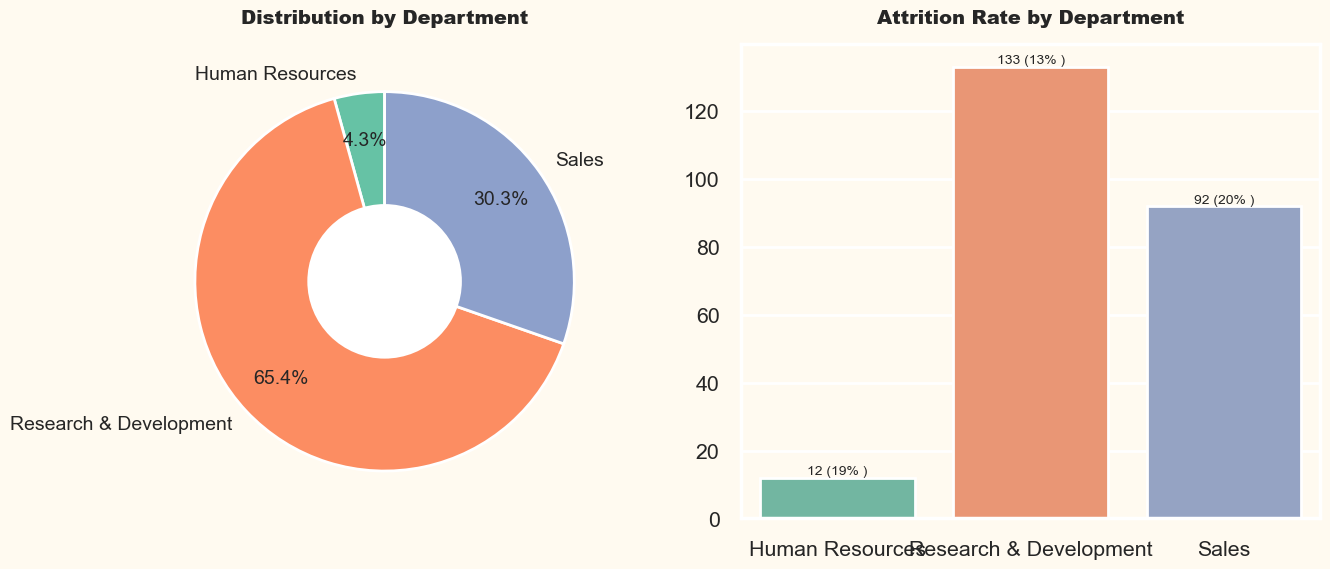

In [20]:
pie_bar_plot(data, 'Department', 'Attrition')

### Observation-
#### 1.Most of the employees are from Research & Development Department (65.4%).
#### 2.Highest Attrition is in the Sales Department.
#### 3.Human Resources Department Attrition rate is also very high.
#### 4.Attrition in Research & Development Department is least compared to other departments.

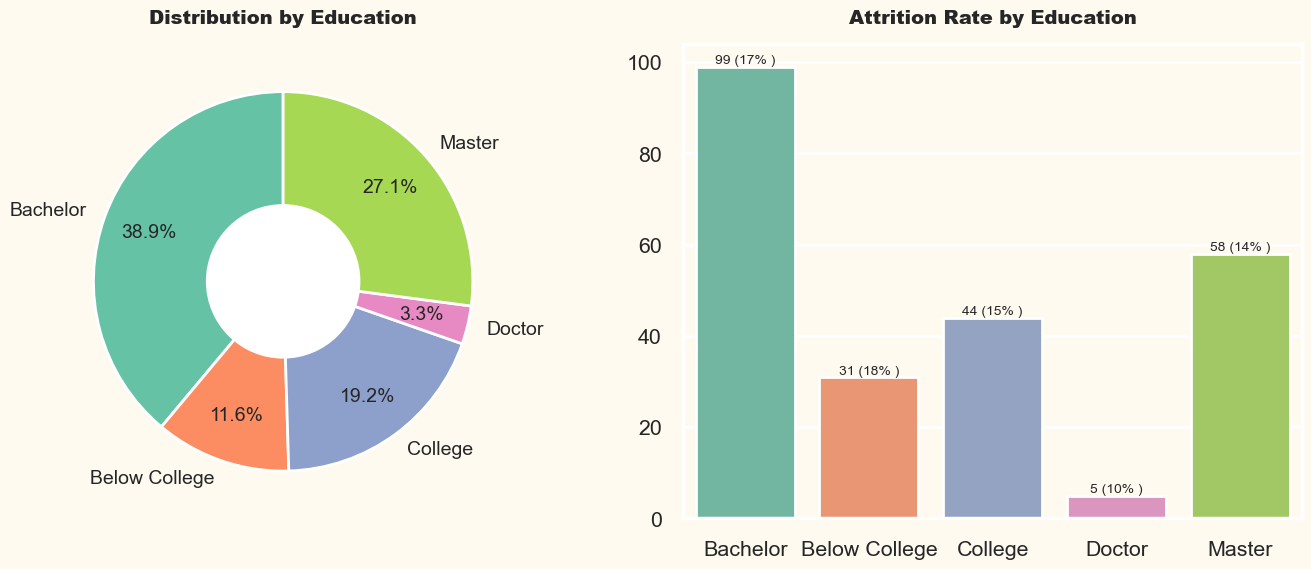

In [21]:
pie_bar_plot(data, 'Education', 'Attrition')


### Observation- 
#### 1.Most of the employees in the organization have completed Bachelors or Masters degree.
#### 2.Very few employees in the organization have completed Doctorate degree.
#### 3.Employee those who have not completed college (Below College level) has highest Attrition rate followed by Bachelor degree holder.

In [22]:
def hist_with_hue(df, col, hue):
    plt.figure(figsize=(13.5, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(x=col, hue=hue, data=df, kde=True, palette='Set2')
    
    # Configure the x-axis to display integer values and center-align the labels
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    plt.xticks(rotation=90, position=(0.5, 0), ha = 'center')  # Rotate x-axis labels by 90 degrees and center-align
    
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=10)

    plt.subplot(1, 2, 2)
    sns.boxplot(x=hue, y=col, data=df, palette='Set2')
    plt.title(f"Distribution by {col} & {hue}", fontweight="black", size=14, pad=10)
    plt.tight_layout()
    plt.show()

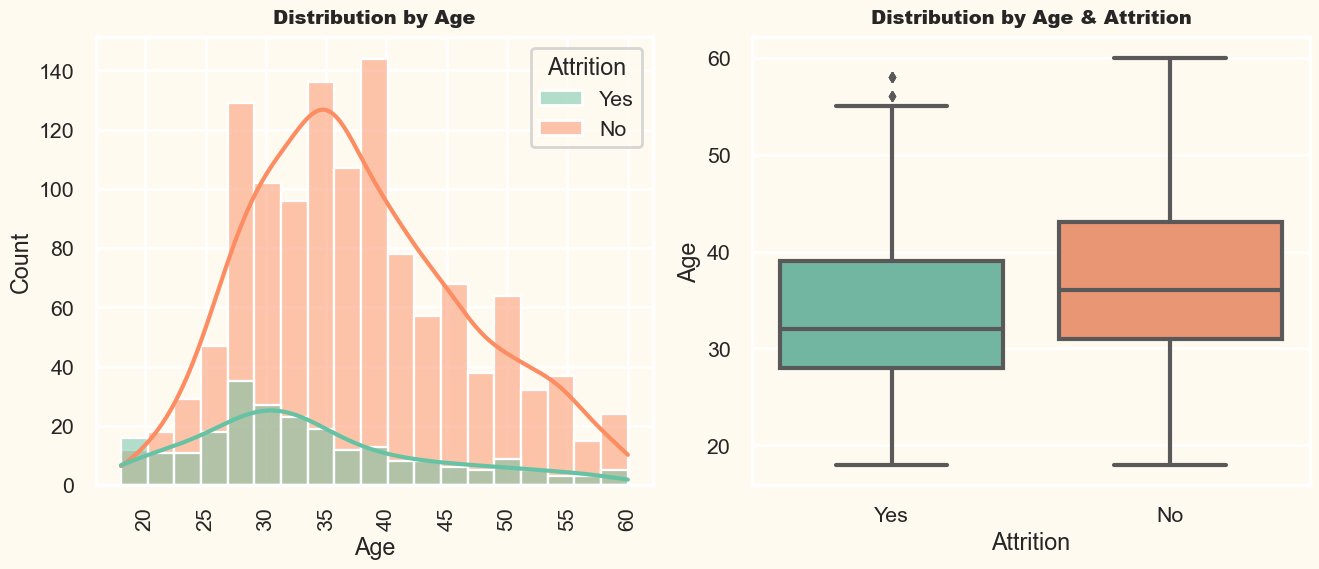

In [23]:
hist_with_hue(data, 'Age', 'Attrition')

### Observation-
#### 1.Most of the emloyees are between age 30 to 40.
#### 2.The medain age of employee who left the organization is less than the employees who are working.
#### 3.We can clearly observe a trend that as the age is increasing the attrition is decreasing.
#### 4.Employees with young age leaves the company more compared to elder employees.

In [24]:
def count_percent_plot(df, col, hue):

    plt.figure(figsize=(13.5, 8))
    plt.subplot(1, 2, 1)
    value_1 = df[col].value_counts()
    sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette='Set2')
    plt.title(f"Employees by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_1.values):
        count_percentage = "{:.1f}%".format((value / len(df)) * 100)
        plt.text(index, value, f"{value} ({count_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)

    # Sort the values for the second subplot to match the order of the first subplot
    value_2 = df[df[hue] == 'Yes'][col].value_counts().reindex(value_1.index)

    plt.subplot(1, 2, 2)
    attrition_rate = (value_2 / value_1 * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, order=value_1.index, palette='Set2')
    plt.title(f"Employee Attrition by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2.values):
        attrition_percentage = "{:.1f}%".format(np.round(attrition_rate[index], 1))
        plt.text(index, value, f"{value} ({attrition_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

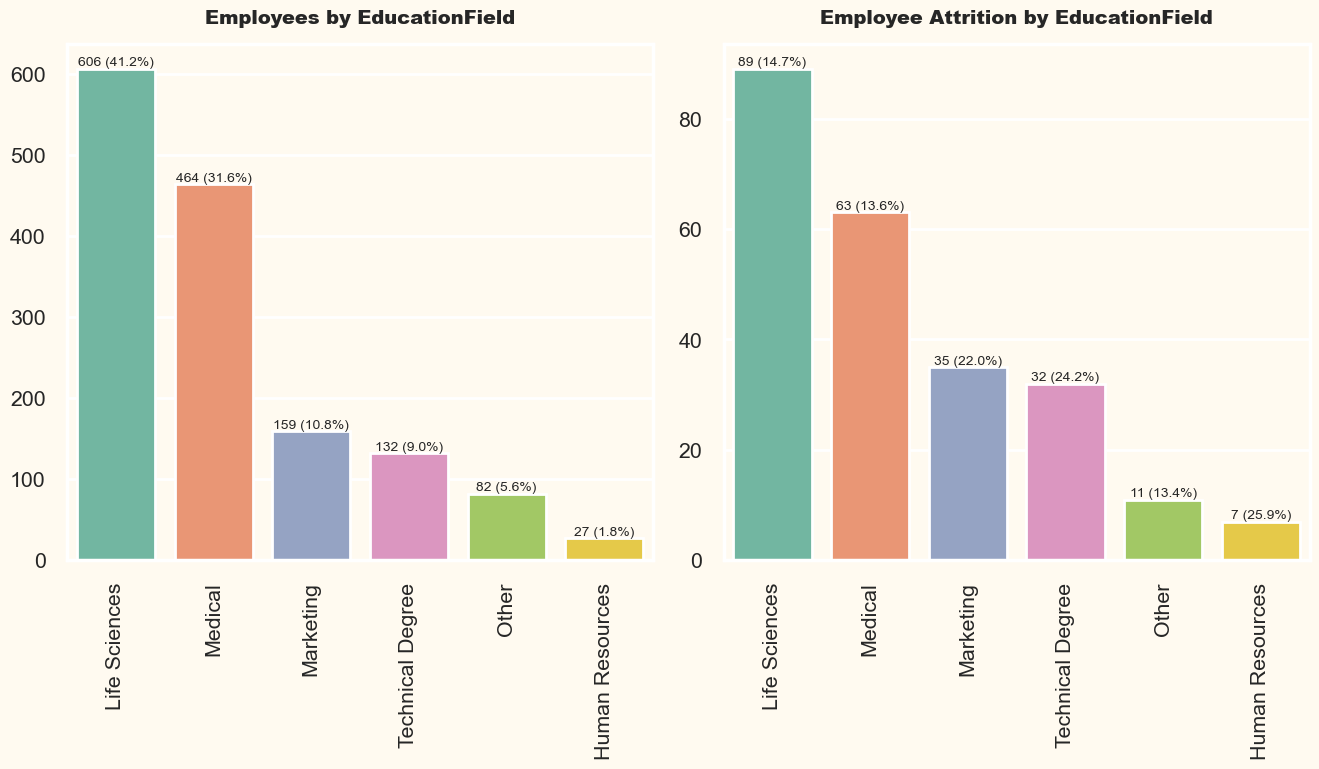

In [25]:
count_percent_plot(data, 'EducationField', 'Attrition')

### Observation-
#### 1.Most of the employees are either from Life Science or Medical Education Field.
#### 2.Education Fields like Human Resources, Technical, Marketing is having very high attrition rate.
#### 3.This may be because of work load becuase there are very few employees in these education fields compared to education field with less attrition rate.

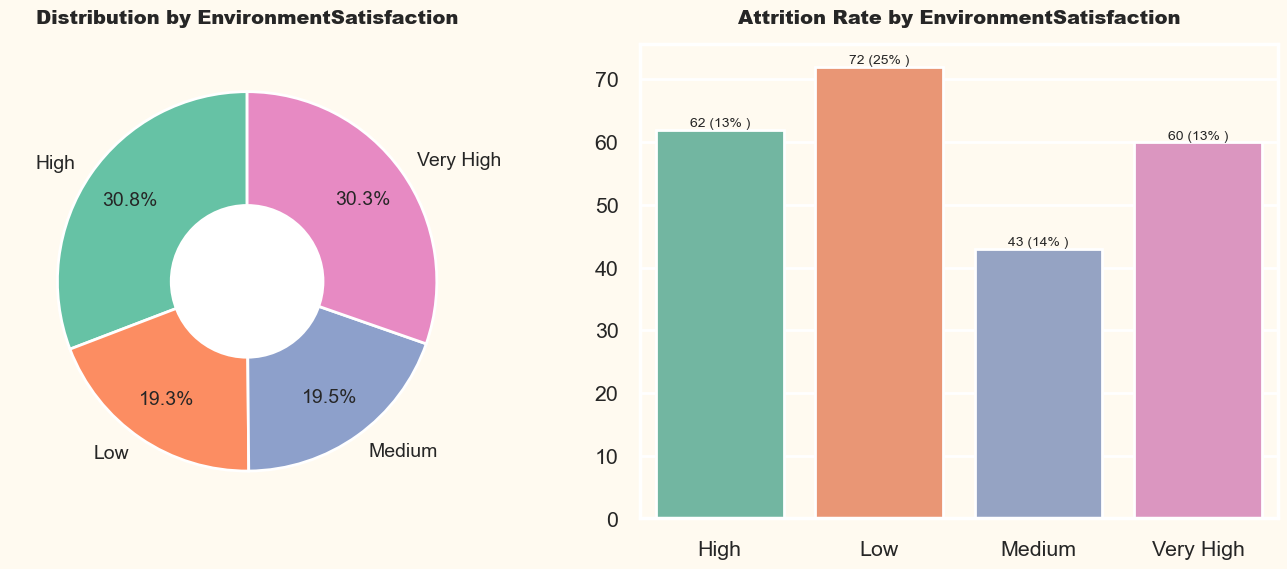

In [26]:
pie_bar_plot(data, 'EnvironmentSatisfaction', 'Attrition')

### Observation-
#### 1.Most of the employees have rated the organization environment satisfaction High & Very High.
#### 2.Attrition Rate is high among the employee with high level of environment satisfication.

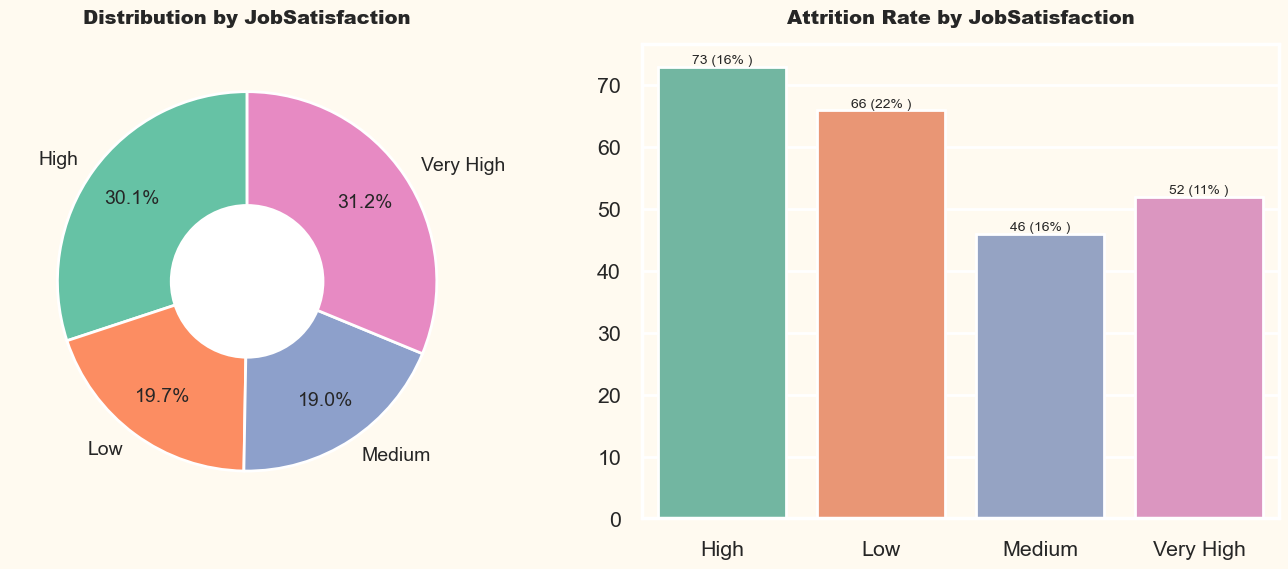

In [27]:
pie_bar_plot(data, 'JobSatisfaction', 'Attrition')

### Observation-
#### 1.Most of the employees have rated their job satisfaction as high or very high.
#### 2.Employees who rated their job satisfaction low are mostly leaving the organization.

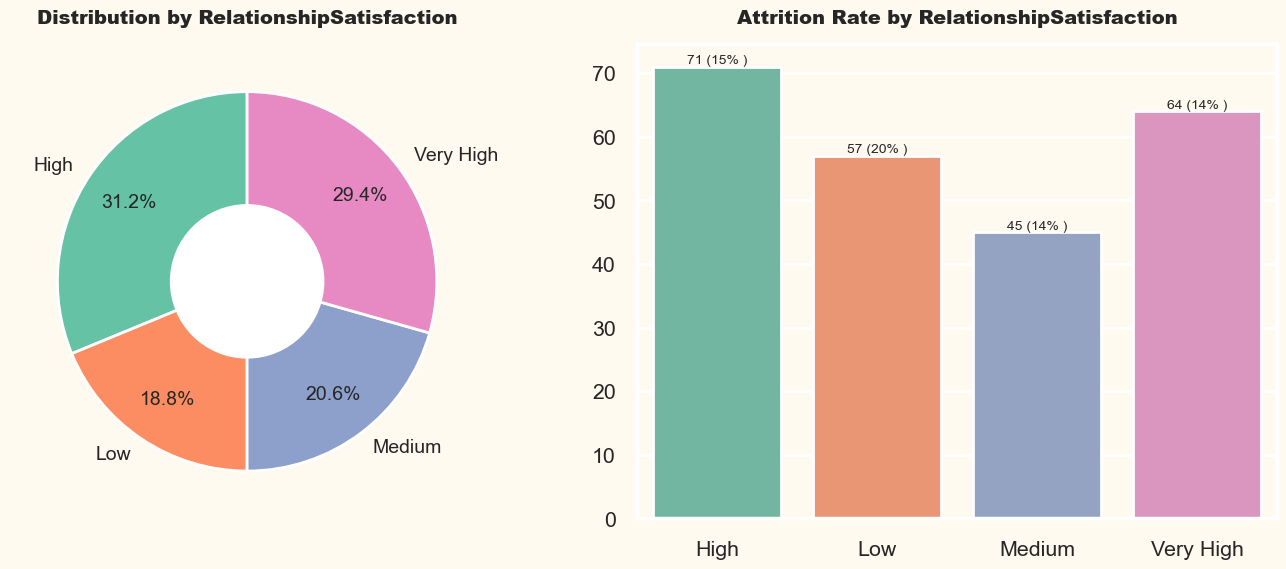

In [28]:
pie_bar_plot(data, 'RelationshipSatisfaction', 'Attrition')

### Observation- 
#### 1.Most of the employees are having high or very high relationship satisfaction.
#### 2.Employe with 'low' relationship satification are most likely to leave the organisation.

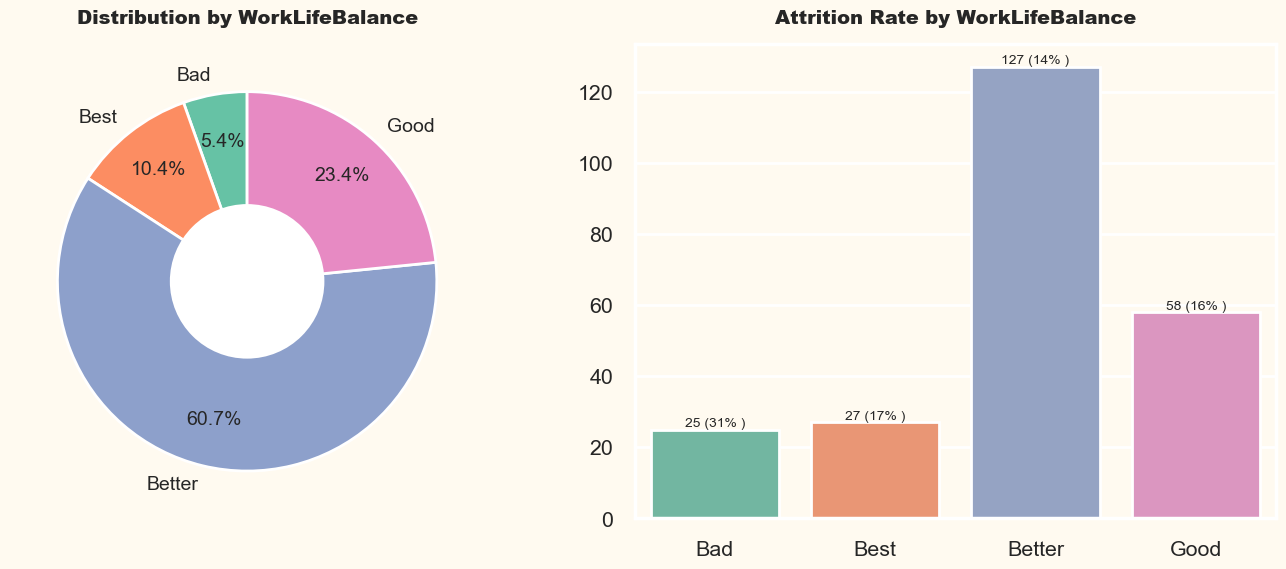

In [29]:
pie_bar_plot(data, 'WorkLifeBalance', 'Attrition')

### Observation- 
#### 1.More than 60% of employees are having a better work life balance.
#### 2.Employees with Bad Work Life Balance is having very high Attrition Rate.

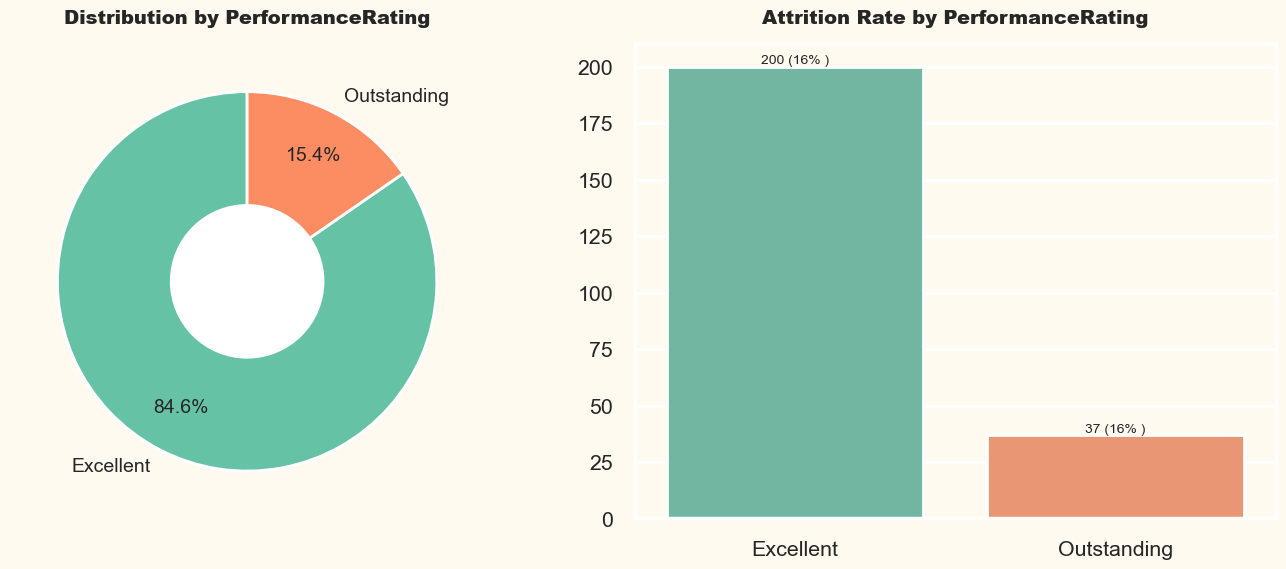

In [30]:
pie_bar_plot(data, 'PerformanceRating', 'Attrition')

### Observation- 
#### 1.Most of the employees are having excellent performance rating.
#### 2.Both the categories in this field is having same attriton rate.
#### 3.No meaningful insight from this feature.

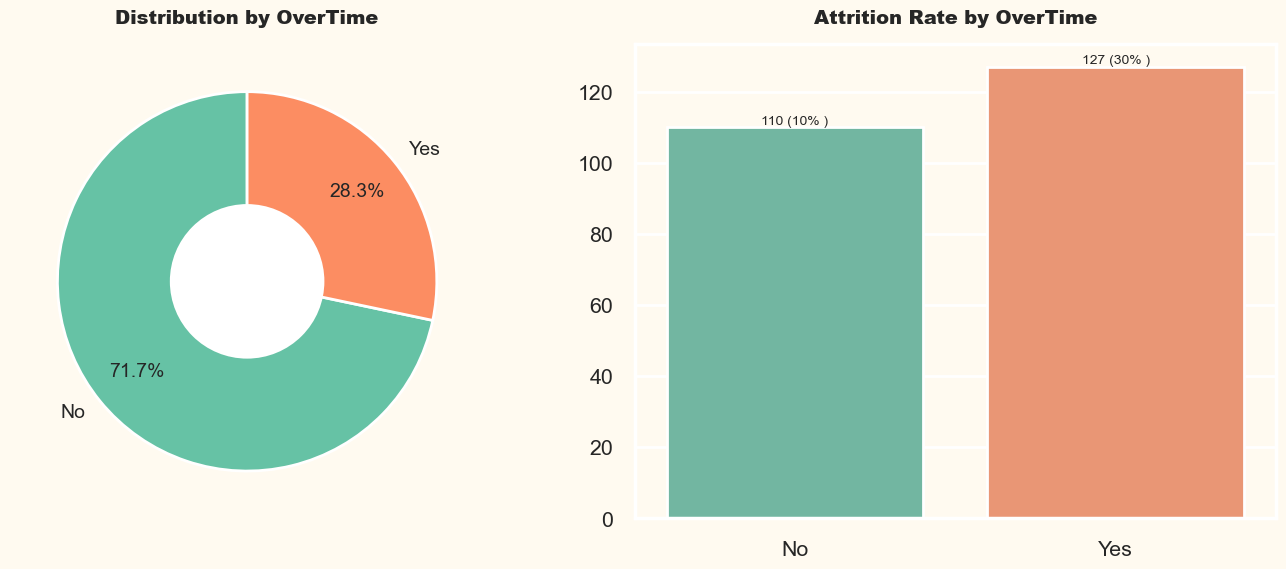

In [31]:
pie_bar_plot(data, 'OverTime', 'Attrition')

### Observation- 
#### 1.Most of the employees don't OverTime.
#### 2.There is high attrition among those who overtime i.e work for more hours than regular working hours.

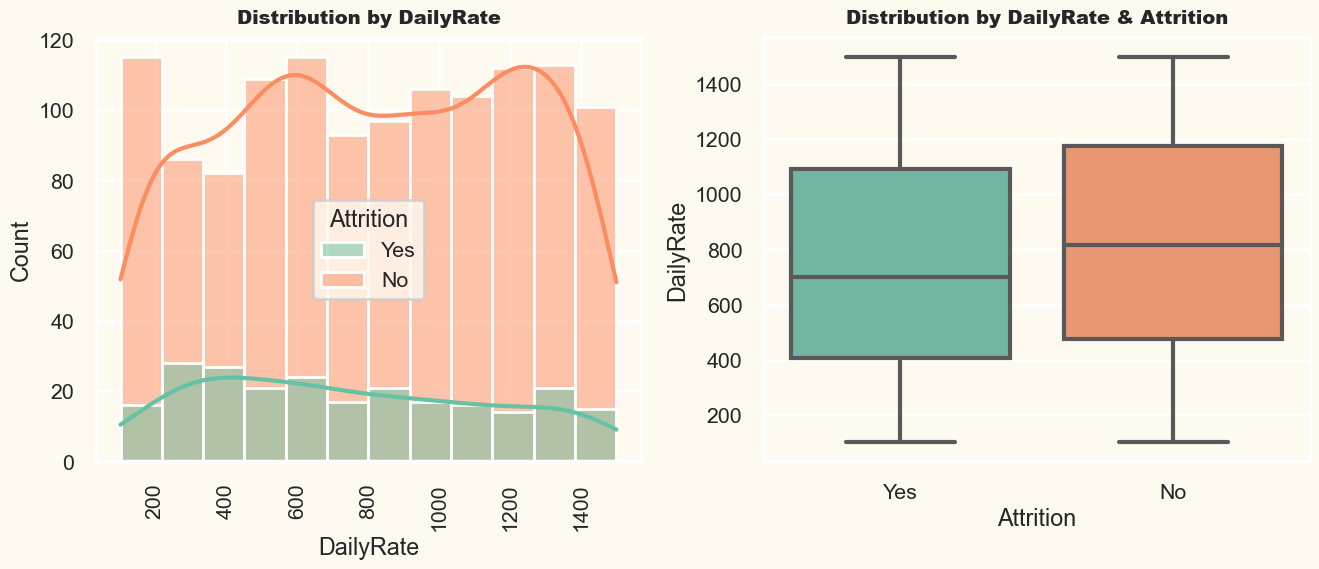

In [32]:
hist_with_hue(data, 'DailyRate', 'Attrition')

### Observation-
#### 1.The medain dailyrate of employee who left the organization is less than the employees who are working.

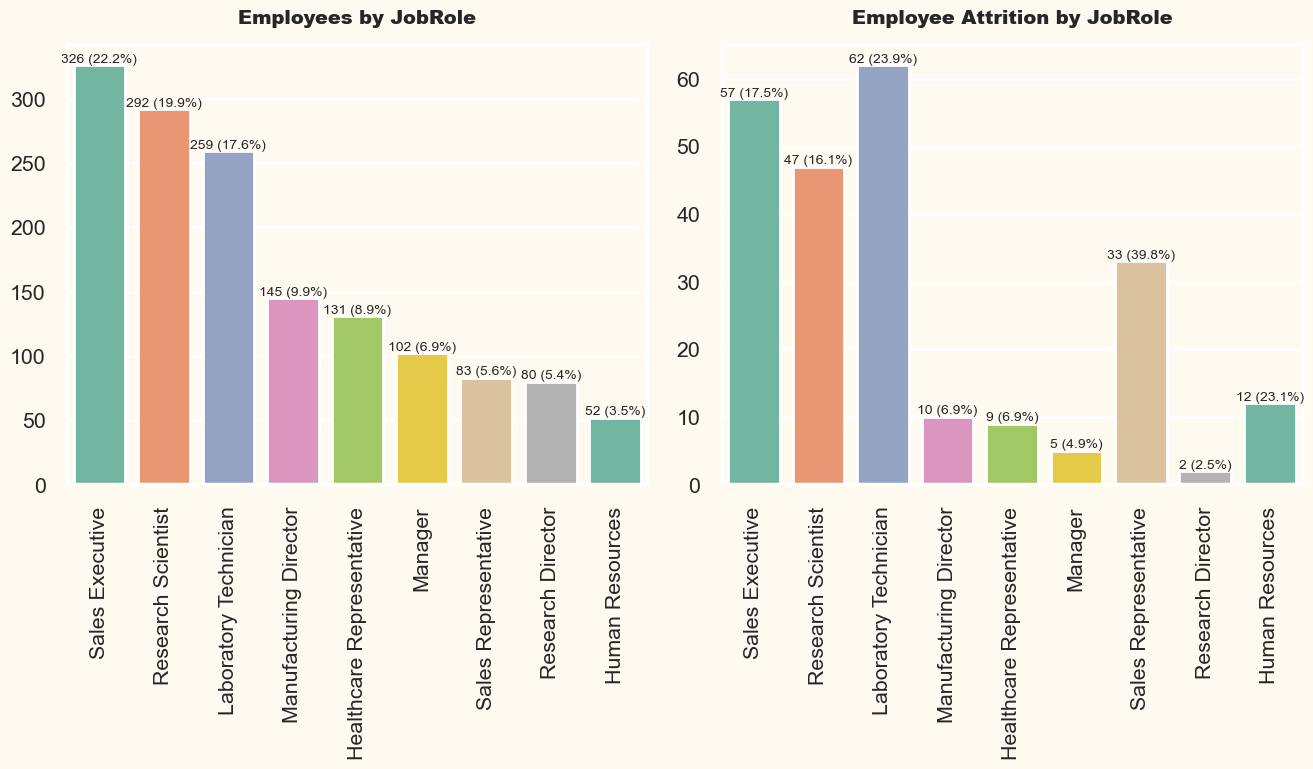

In [33]:
count_percent_plot(data, 'JobRole', 'Attrition')

### Observation- 
#### 1.Most employees is working as Sales executive, Research Scientist or Laboratory Technician.
#### 2.Highest attrition rates are in role of Sale Representative.

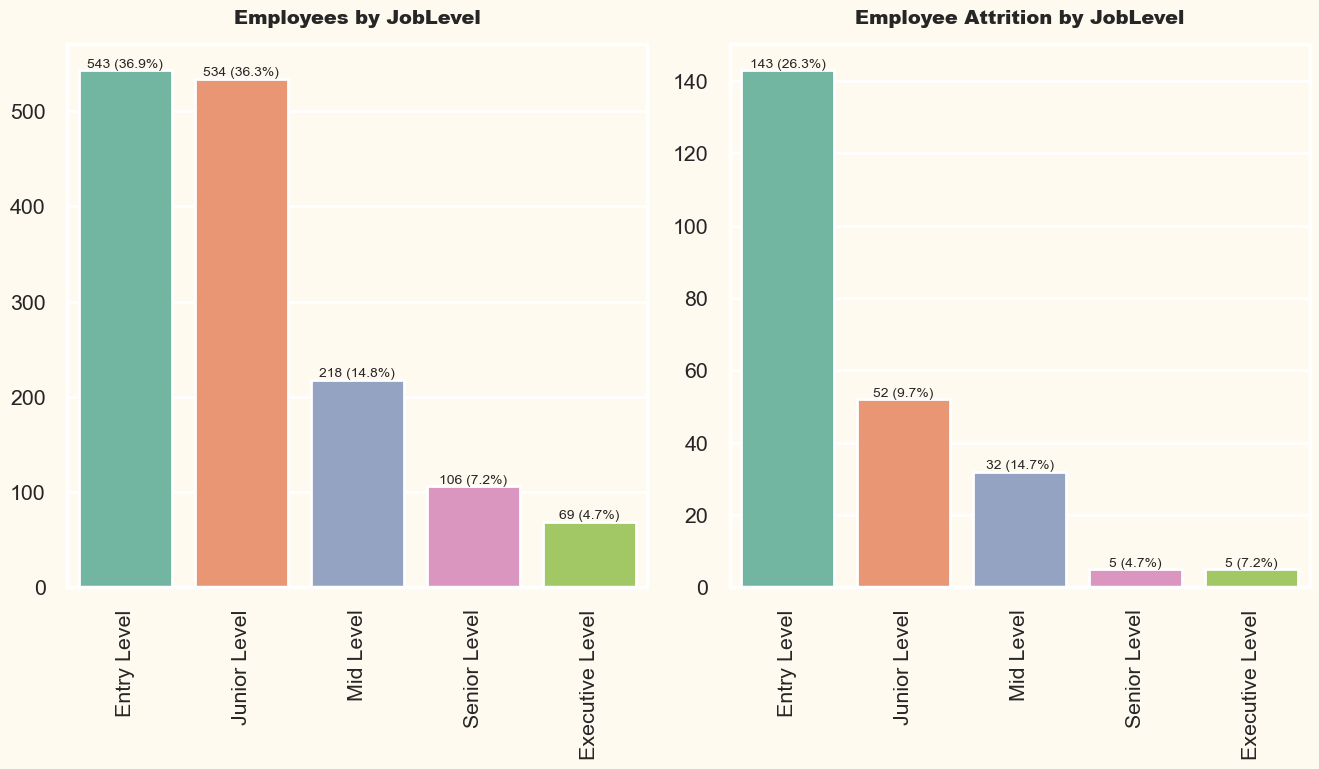

In [34]:
count_percent_plot(data, 'JobLevel', 'Attrition')

### Observation- 
#### 1.Most of the employees in the organization are at Entry Level or Junior Level.
#### 2.Highest Attrition is at the Entry Level.

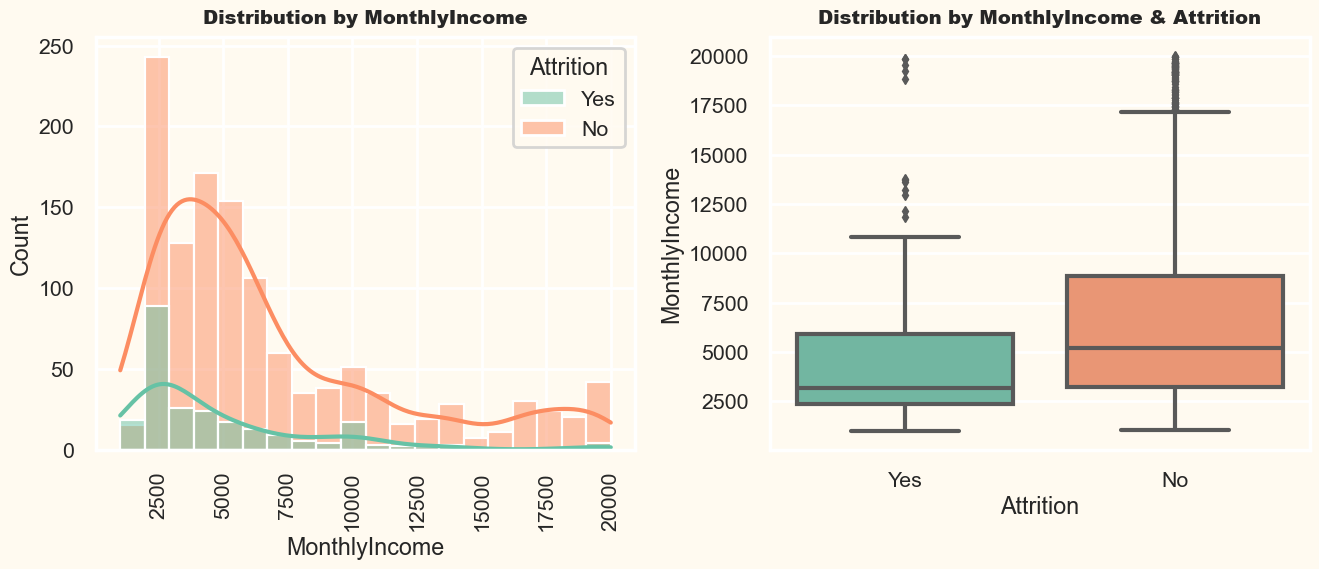

In [35]:
hist_with_hue(data, 'MonthlyIncome', 'Attrition')

### Observation- 
#### 1. Most of the employees are getting paid less than 10000 in the organiation.
#### 2. The median monthly income of employee who have left is comparatively low with employee who are still working.
#### 3.As the Monthly Income increases the attrition decreases.

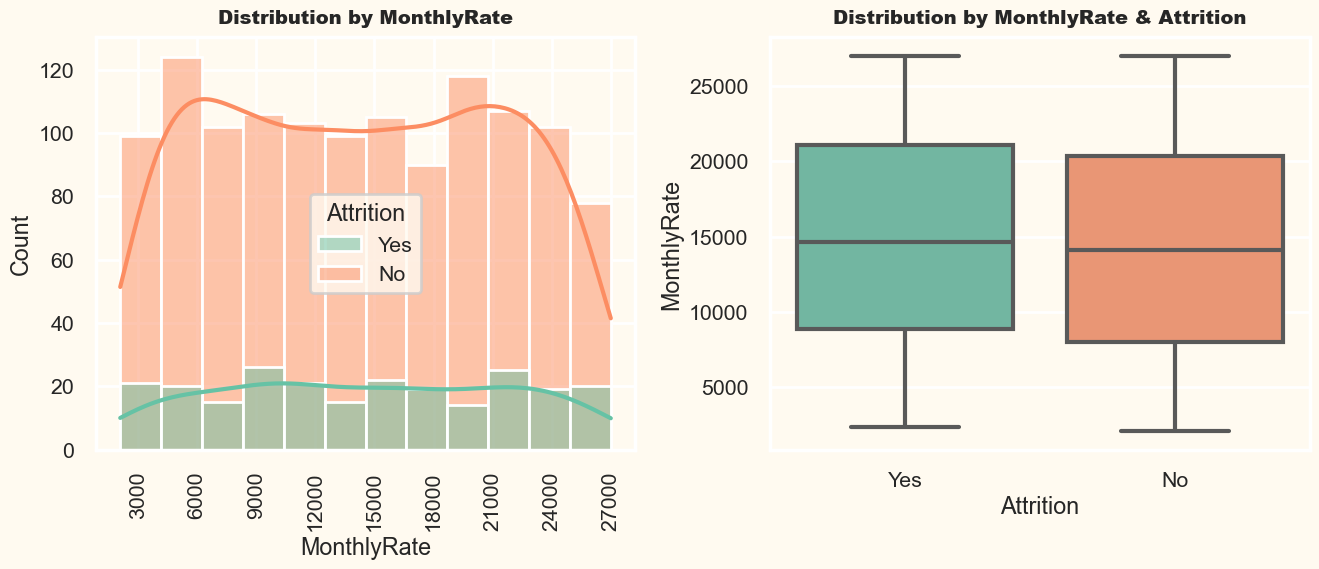

In [36]:
hist_with_hue(data, 'MonthlyRate', 'Attrition')

### Observation- 
#### 1.The distribution of MonthlyRate is similar througout the column.
#### 2.So this feature doesn't provide any meaningful insights in the employee attrition.

In [37]:
print("Total Unique Values in 'DistanceFromHome' Attribute is =>",data["DistanceFromHome"].nunique())

Total Unique Values in 'DistanceFromHome' Attribute is => 29


In [38]:
data["DistanceFromHome"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0


In [39]:
bin_edges = [0,5,10,15,20,30]

# Define the labels for the groups
bin_labels = ['0-5 kms', '6-10 kms', '11-15 kms','16-20 kms', '20+ kms']

# CuttinG the DistaanceFromHome column into groups
data['DistanceGroup'] = pd.cut(data['DistanceFromHome'], bins=bin_edges, labels=bin_labels)

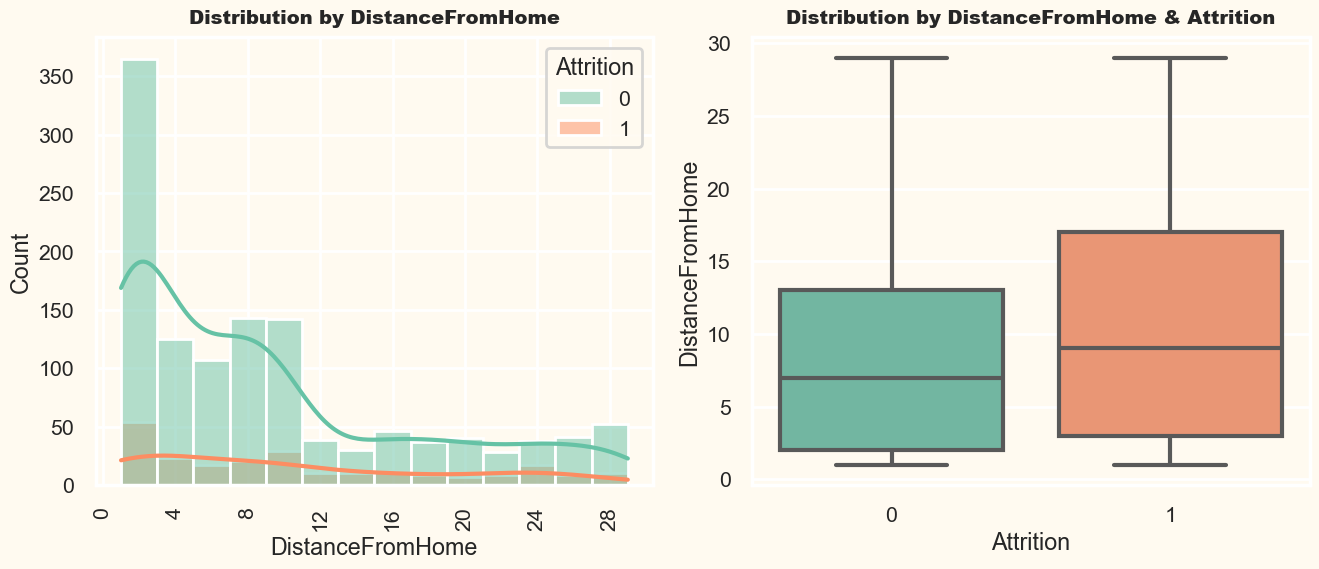

In [94]:
hist_with_hue(data, 'DistanceFromHome', 'Attrition')

### Observation- 
#### 1. Most of the employees are living within 10kms radius from the organisation.
#### 2.As the distance from the organisation increases, Attrition Rate also increases.

In [41]:
print("Total Unique Values in 'NumCompaniesWorked' Attribute is =>",data["NumCompaniesWorked"].nunique())

Total Unique Values in 'NumCompaniesWorked' Attribute is => 10


In [42]:
data["NumCompaniesWorked"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0


In [43]:
# Define the bin edges for the groups
bin_edges = [-1, 1, 3, 5, 10]     # starting from -1 since we have '0' in the data

# Define the labels for the groups
bin_labels = ['0-1 Companies', '2-3 companies', '4-5 companies', "6-9 companies"]

# Cut the DailyRate column into groups
data["NumCompaniesWorkedGroup"] = pd.cut(data['NumCompaniesWorked'], bins=bin_edges, labels=bin_labels)

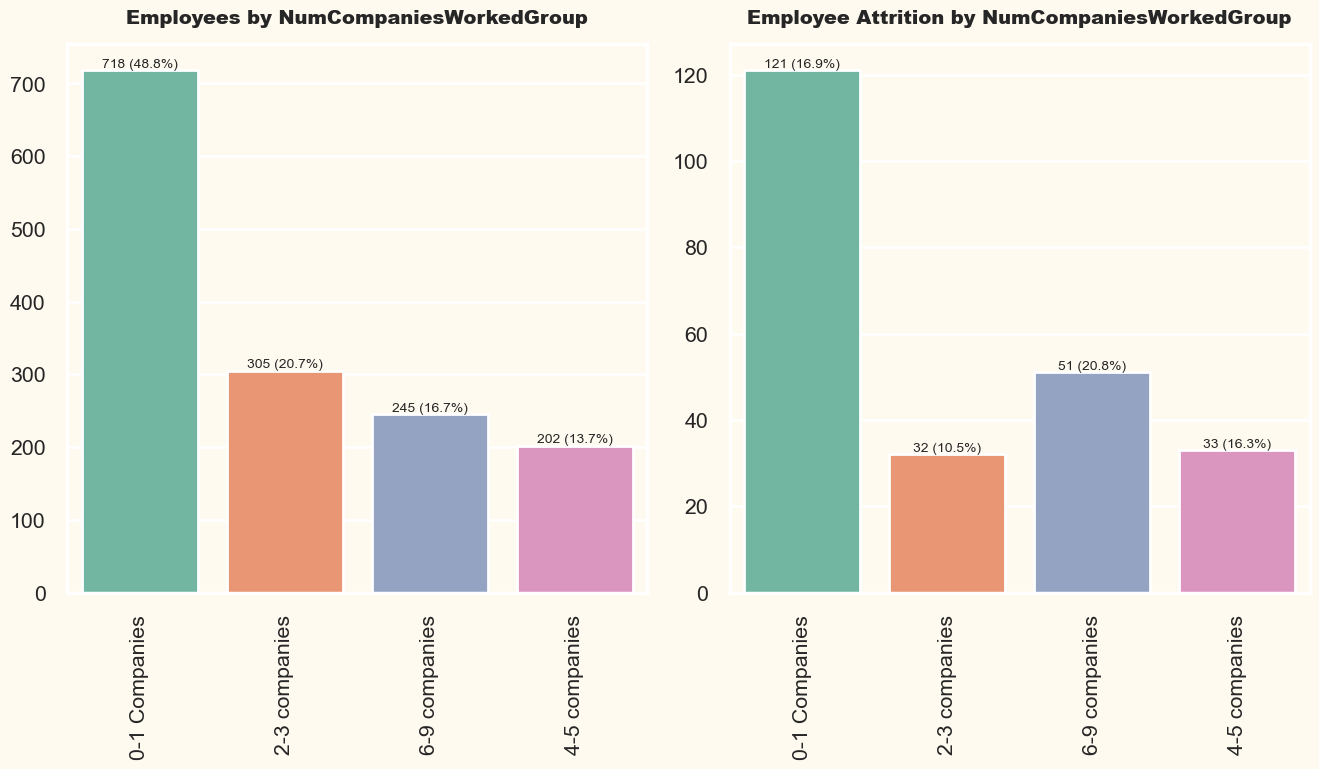

In [44]:
count_percent_plot(data, 'NumCompaniesWorkedGroup', 'Attrition')


### Observation- 
#### 1.Most of the employees have worked for less than 2 companies.
#### 2.There's a high attrition rate of employees who haved worked for more than 5 companies followed by the employee who have worked for less than two companies

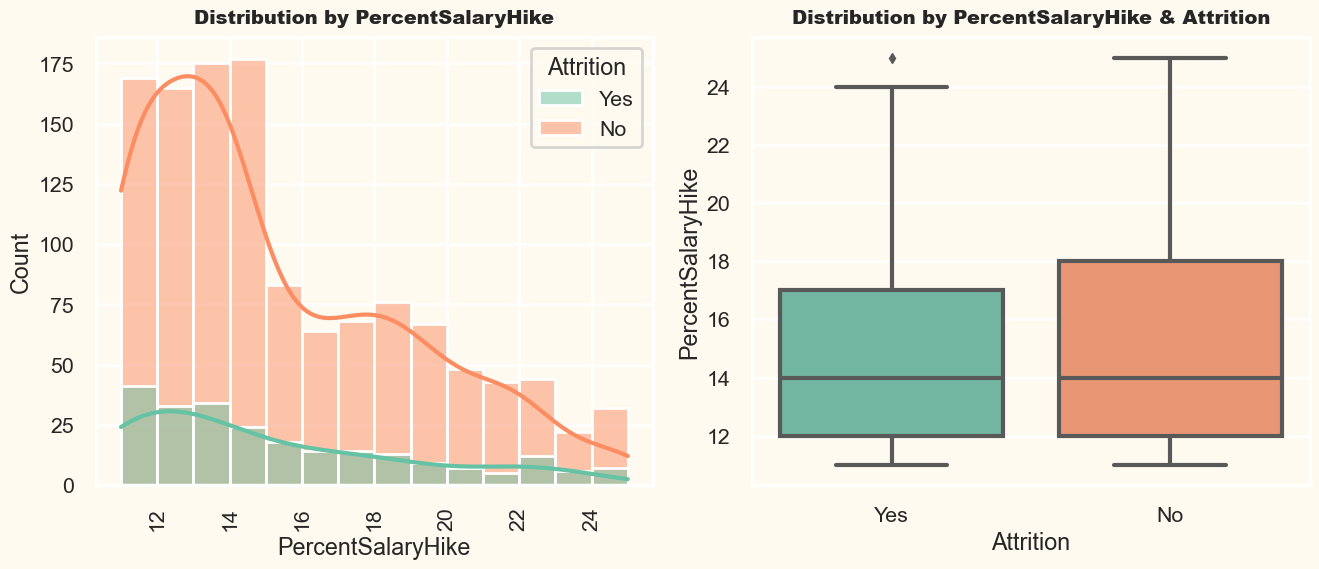

In [45]:
hist_with_hue(data, 'PercentSalaryHike', 'Attrition')

### Observation- 
#### 1. Very Few employees are getting a high percent salary hike.
#### 2. As the amount of percent salary increases the attrition rate decreases.

In [46]:
print("Total Unique Values in 'TotalWorkingYears' Attribute is =>",data["TotalWorkingYears"].nunique())

Total Unique Values in 'TotalWorkingYears' Attribute is => 40


In [47]:
data["TotalWorkingYears"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.0,40.0


In [48]:
# Define the bin edges for the groups
bin_edges = [-1, 3, 5, 10, 20, 50]     # starting from -1 since we have '0' in the data

# Define the labels for the groups
bin_labels = ['0-3 years', '4-5 years', '6-10 years', '11-20 years', "20+ years"]

# Cut the DailyRate column into groups
data["TotalWorkingYearsGroup"] = pd.cut(data['TotalWorkingYears'], bins=bin_edges, labels=bin_labels)

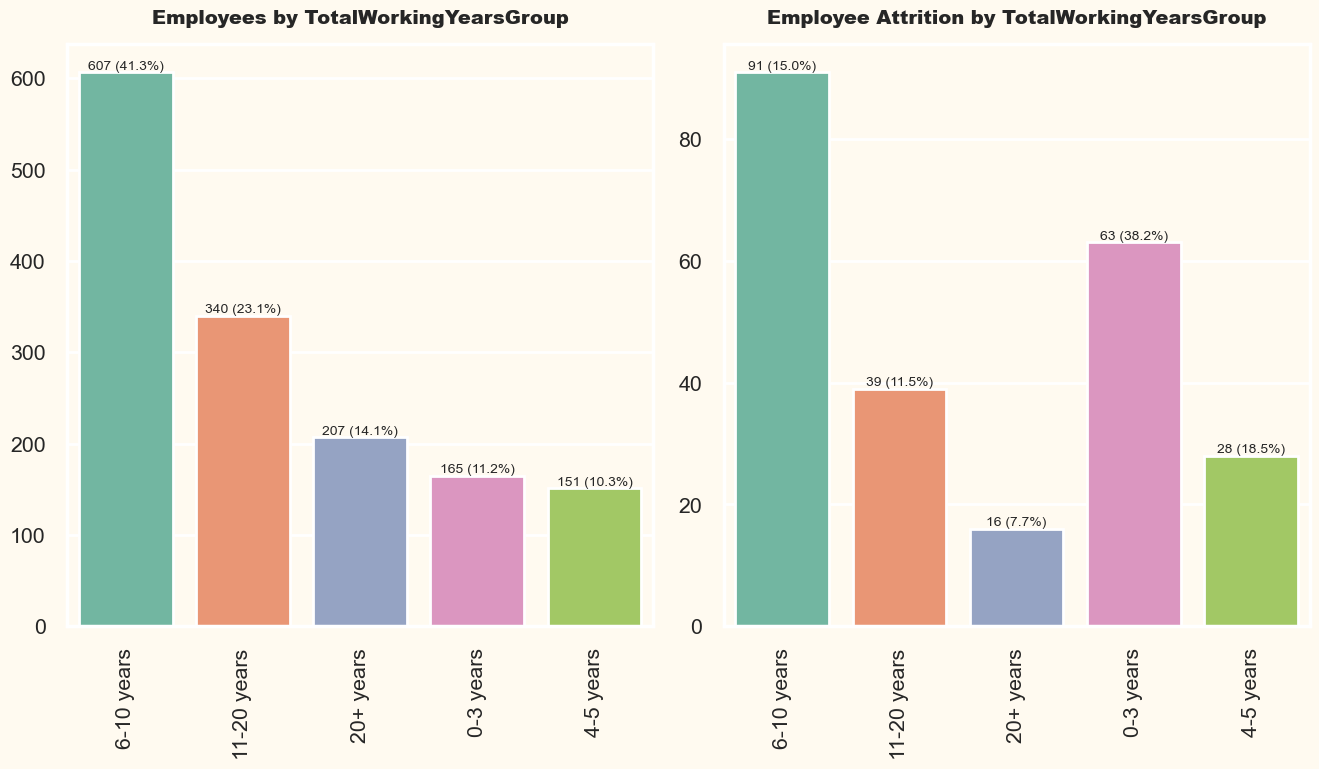

In [49]:
count_percent_plot(data, 'TotalWorkingYearsGroup', 'Attrition')

### Observation-
#### 1.Most of the employees are having a total of 6 to 10 years of working experience.
#### 2.Employee with working experience upto 3 years are having High Attrition Rate.
#### 3.Employee with working experience of above 10 years are having Less Attrition Rate.

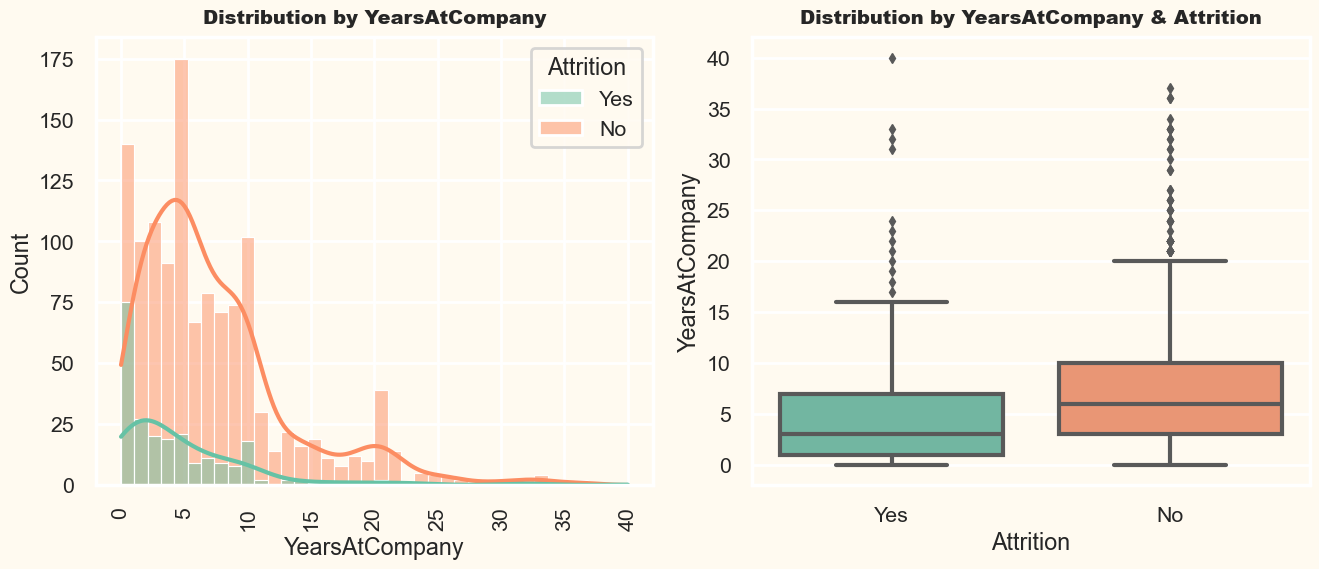

In [50]:
hist_with_hue(data, 'YearsAtCompany', 'Attrition')

### Observation- 
#### 1.Employee who have worked for 10+ years are having low attrition rate.
#### 2.Highest Attrition is in the first year of employee joining organisation.

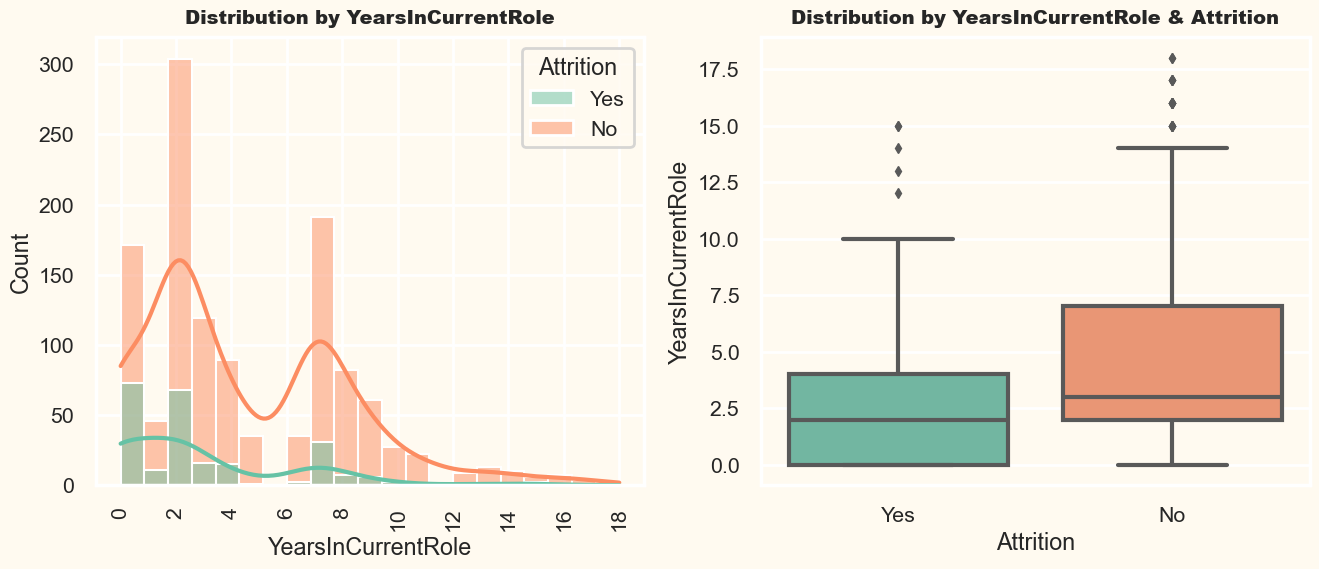

In [51]:
hist_with_hue(data, 'YearsInCurrentRole', 'Attrition')

### Observation- 
#### 1.Employee who have worked for 8+ years in Current Role are less likely to leave organisation.
#### 2.Highest Attrition is in the first two year of the Current Role.

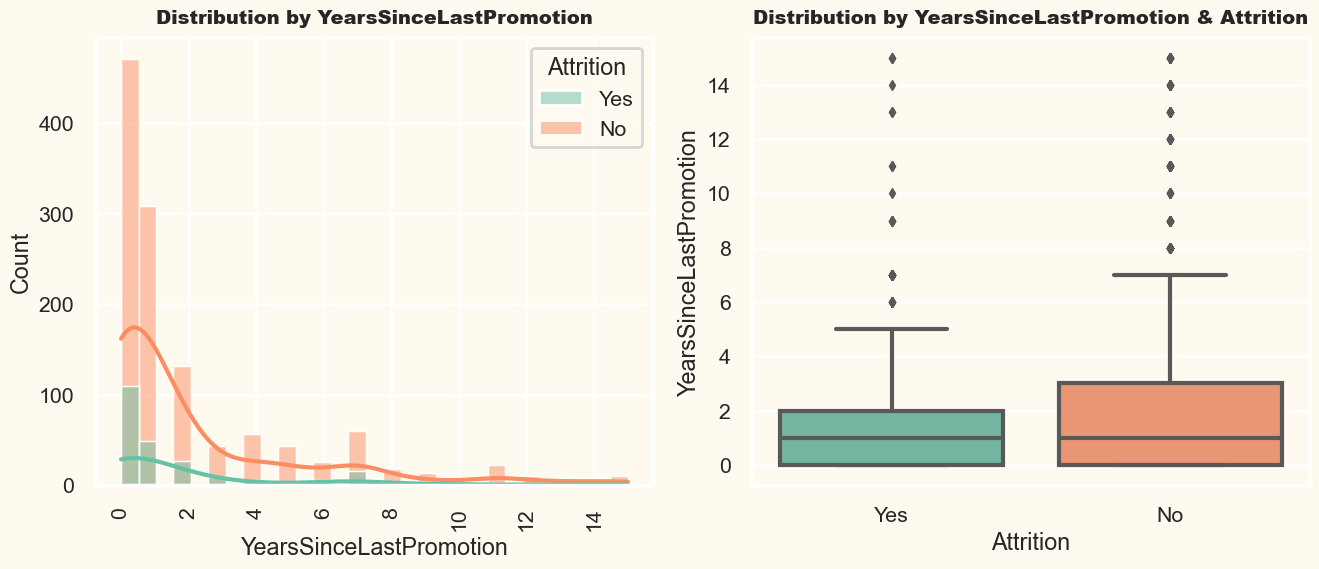

In [52]:
hist_with_hue(data, 'YearsSinceLastPromotion', 'Attrition')

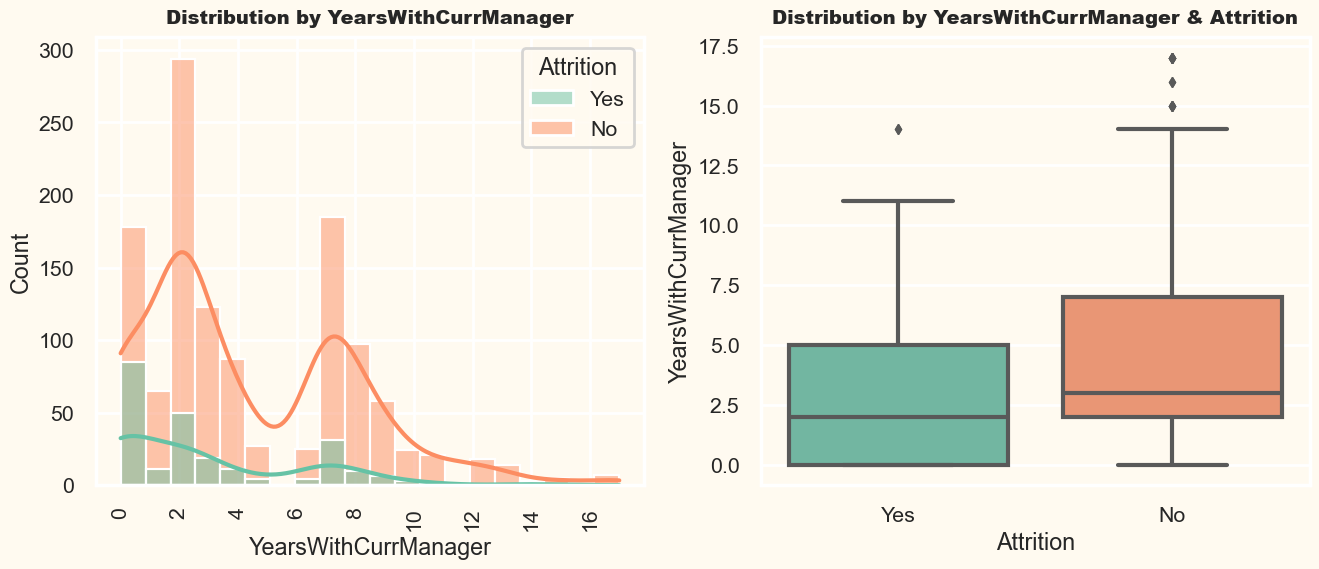

In [53]:
hist_with_hue(data, 'YearsWithCurrManager', 'Attrition')

### Doing label encoding for making machine readable columns  

In [54]:
data["EnvironmentSatisfaction"] = data["EnvironmentSatisfaction"].replace({"Low":0 ,"Medium":1, "High":2, "Very High":3})
data["JobInvolvement"] = data["JobInvolvement"].replace({"Low":0,"Medium":1,"High":2,"Very High":3})
data["JobSatisfaction"] = data["JobSatisfaction"].replace({"Low":0,"Medium":1,"High":2,"Very High":3})
data["PerformanceRating"] = data["PerformanceRating"].replace({"Low":0,"Good":1,"Excellent":2,"Outstanding":3})
data["RelationshipSatisfaction"] = data["RelationshipSatisfaction"].replace({"Low":0,"Medium":1,"High":2,"Very High":3})
data["WorkLifeBalance"] = data["WorkLifeBalance"].replace({"Bad":0,"Good":1,"Better":2,"Best":3})
data["Education"] = data["Education"].replace({"Below College":0,"College":1,"Bachelor":2,"Master":3,"Doctor":4})
data["JobLevel"] = data["JobLevel"].replace({"Entry Level":0,"Junior Level":1,"Mid Level":2,
                                           "Senior Level":3,"Executive Level":4})
data["Gender"] = data["Gender"].replace({"Female":0 ,"Male":1})
data["Attrition"] = data["Attrition"].replace({"No":0 ,"Yes":1})

In [55]:
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
cat_cols

['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['BusinessTravel'] = le.fit_transform(data['BusinessTravel'])
data['Department'] = le.fit_transform(data['Department'])
data['EducationField'] = le.fit_transform(data['EducationField'])
data['JobRole'] = le.fit_transform(data['JobRole'])
data['MaritalStatus'] = le.fit_transform(data['MaritalStatus'])
data['OverTime'] = le.fit_transform(data['OverTime'])

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   int64   
 2   BusinessTravel            1470 non-null   int32   
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   int32   
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   int32   
 8   EnvironmentSatisfaction   1470 non-null   int64   
 9   Gender                    1470 non-null   int64   
 10  HourlyRate                1470 non-null   int64   
 11  JobInvolvement            1470 non-null   int64   
 12  JobLevel                  1470 non-null   int64   
 13  JobRole                   1470 non-null   int32 

In [58]:
cols = ["DistanceGroup", "NumCompaniesWorkedGroup", "TotalWorkingYearsGroup"]
data.drop(columns=cols, inplace=True)

### Checking for correlation between variables

<AxesSubplot:title={'center':'Correlation Plot'}>

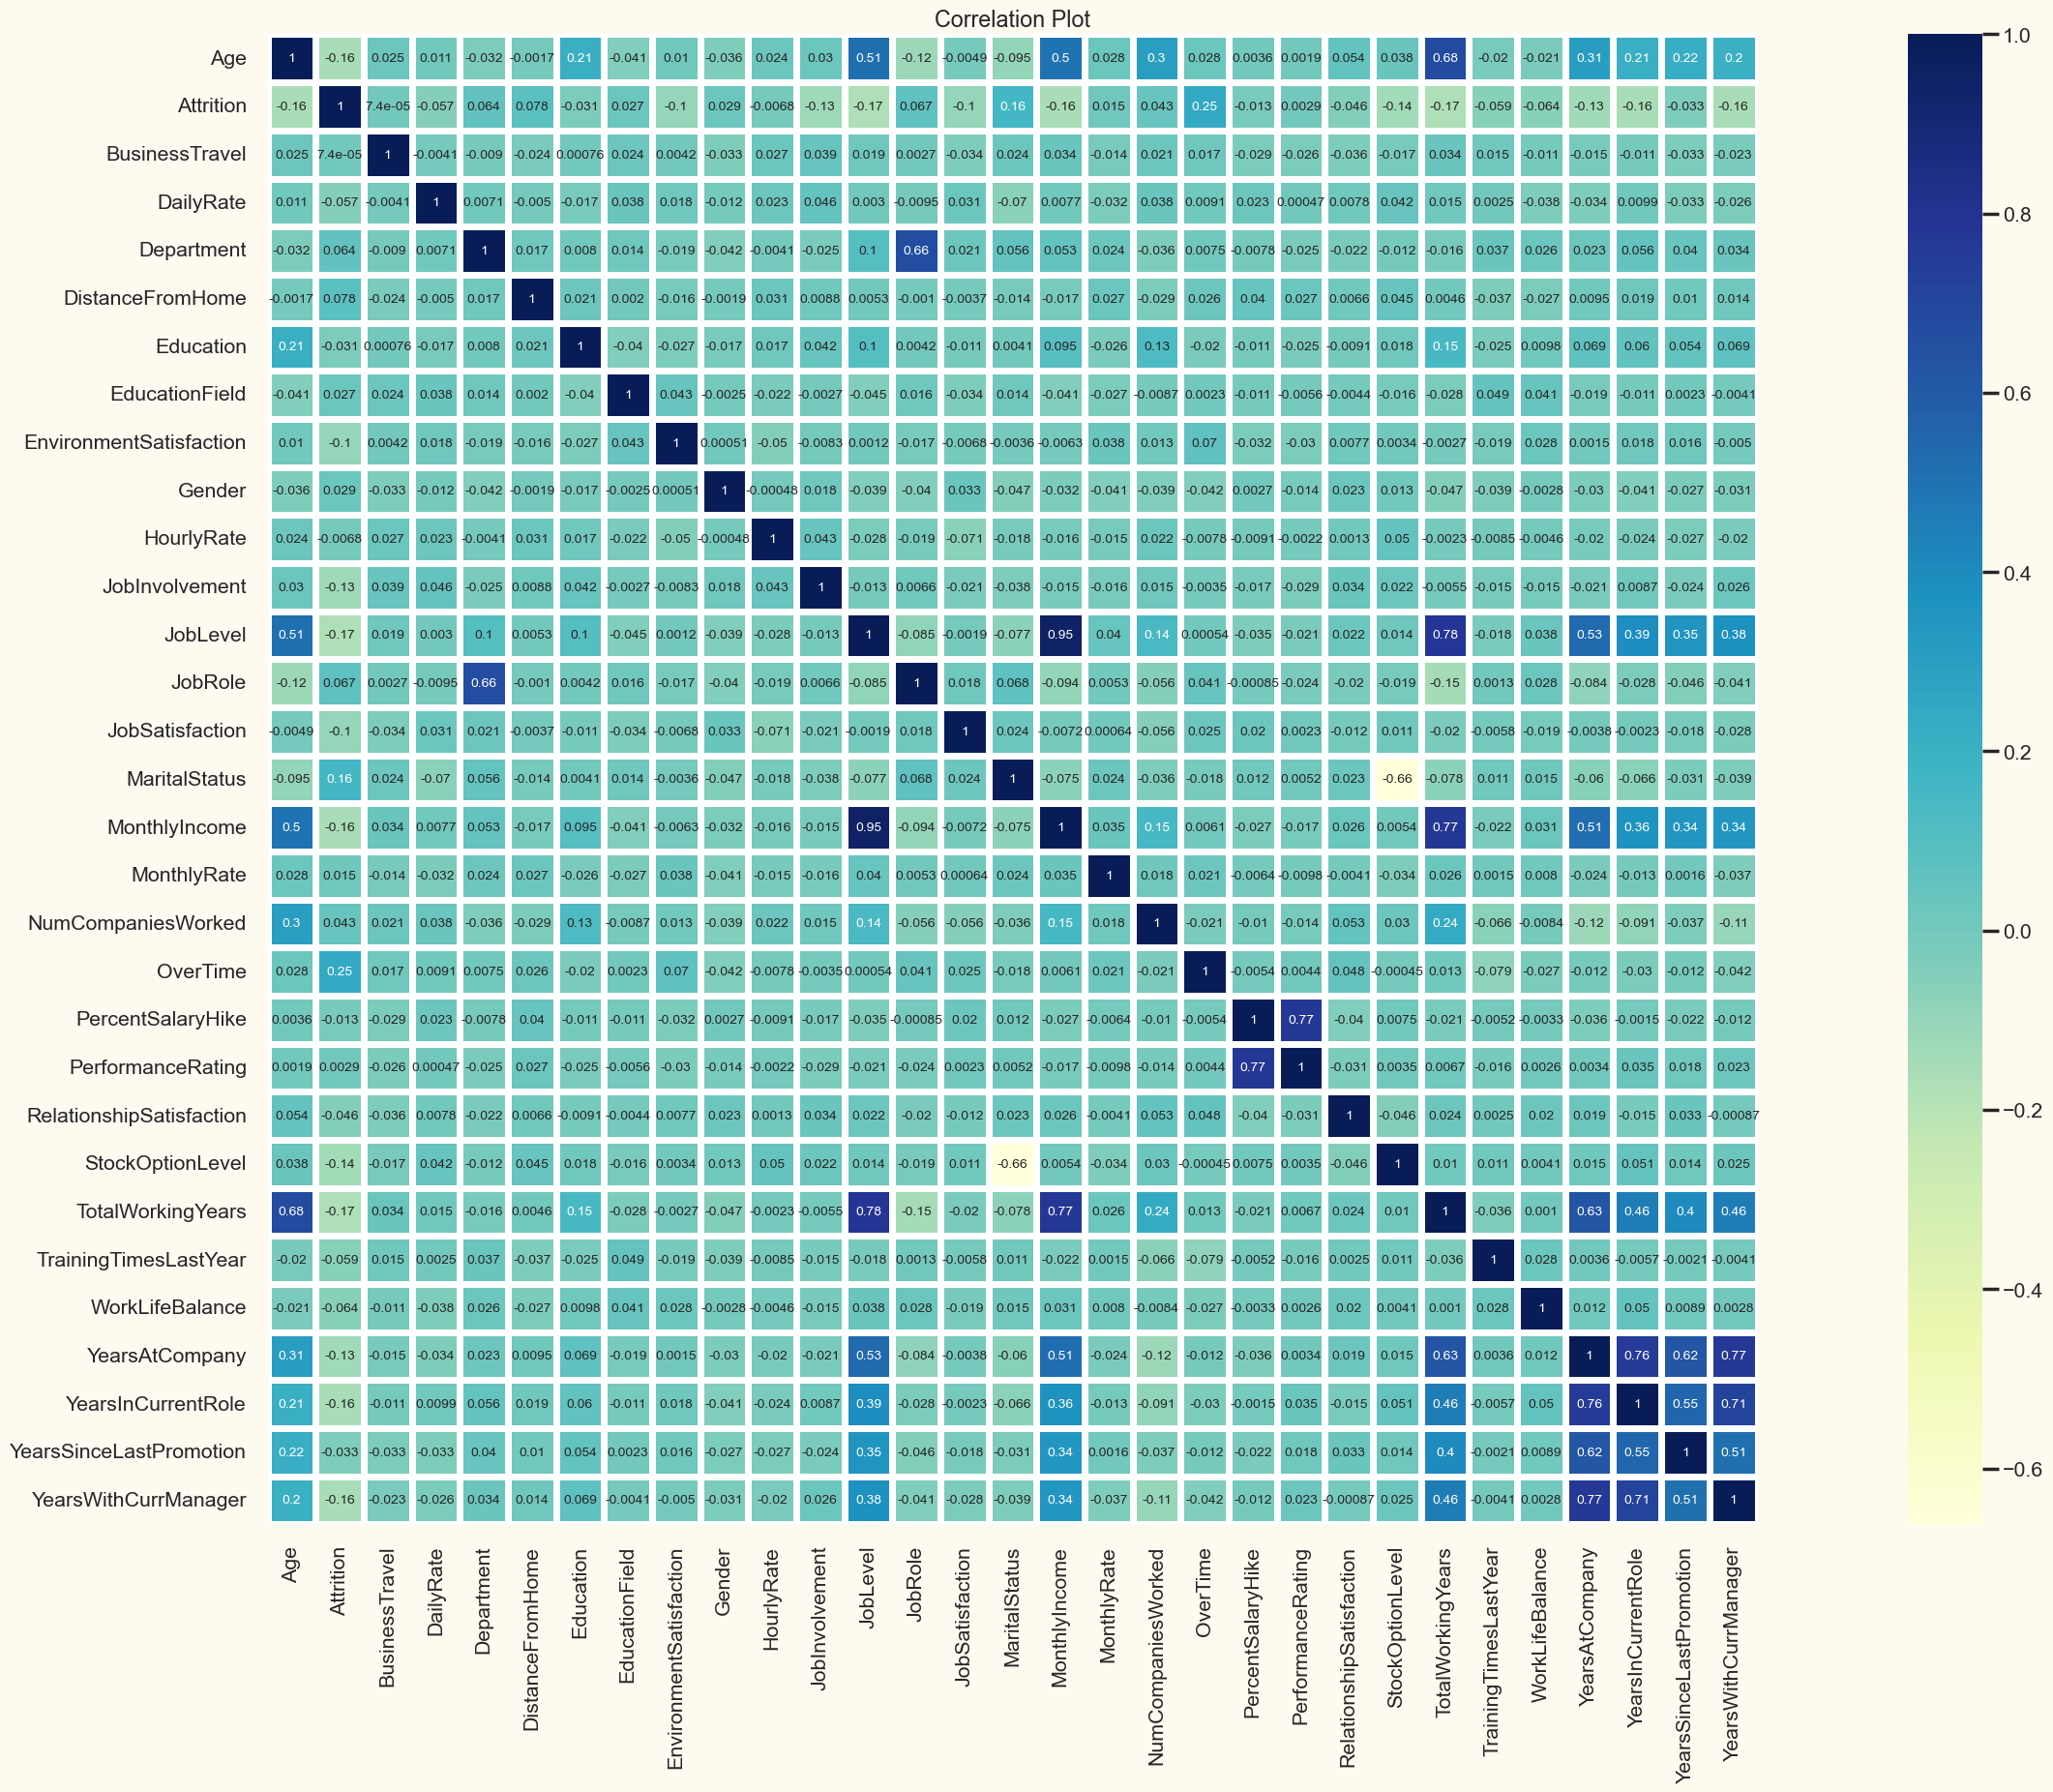

In [59]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(data.corr(),linewidths=5, annot=True, square=True,annot_kws={'size': 10},cmap='YlGnBu')

In [60]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.75
high_correlation_mask = correlation_matrix >= 0.75

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")

# Optionally, you can filter the correlation matrix to display only the highly correlated values
correlation_matrix.where(high_correlation_mask, inplace=True)

Highly correlated features:
JobLevel and MonthlyIncome
JobLevel and TotalWorkingYears
MonthlyIncome and TotalWorkingYears
PercentSalaryHike and PerformanceRating
YearsAtCompany and YearsInCurrentRole
YearsAtCompany and YearsWithCurrManager


In [61]:
cols = ["JobLevel", "TotalWorkingYears", "PercentSalaryHike", "YearsInCurrentRole", "YearsWithCurrManager"]
data.drop(columns=cols, inplace=True)

### Checking for data imbalance

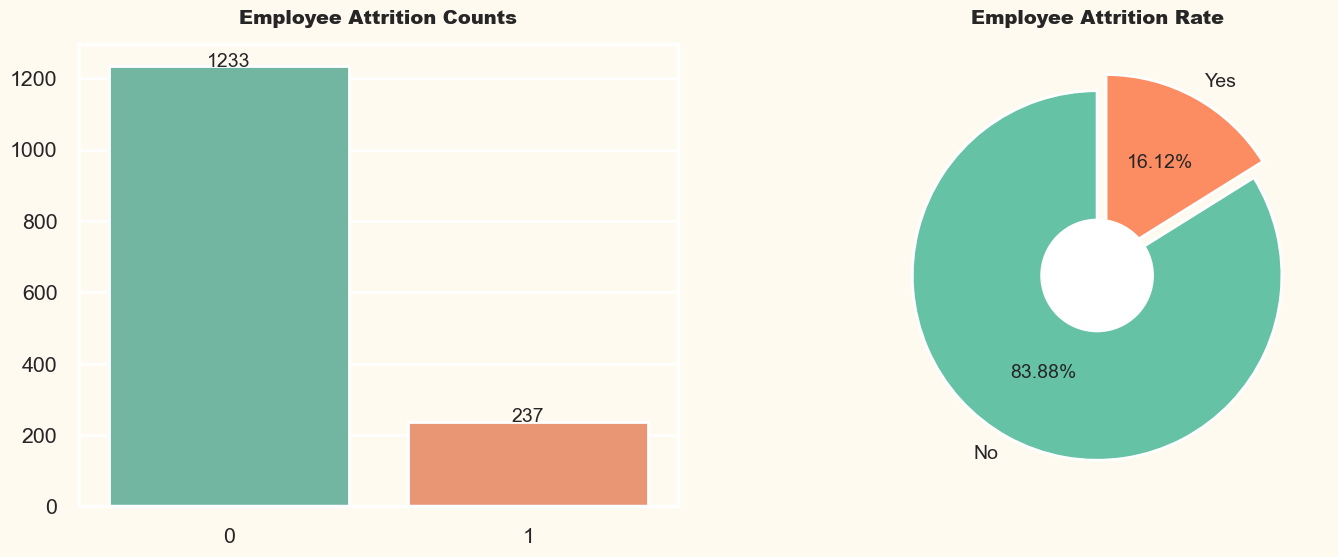

In [62]:
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
attrition_rate = data["Attrition"].value_counts()
sns.barplot(x=attrition_rate.index,y=attrition_rate.values,palette= 'Set2')
plt.title("Employee Attrition Counts",fontweight="black", size=14, pad=15)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontsize=14)

#Visualization to show Employee Attrition in Percentage.
plt.subplot(1,2,2)
colors = sns.color_palette('Set2', len(attrition_rate))
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"size":14},
        colors = colors,explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=14 ,pad=15)
plt.show()

### As dataset is clearly imbalance we can use data balancing techniques 

In [63]:
x = data.drop(['Attrition'], axis=1)
y = data[['Attrition']]

In [64]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,2,1102,2,1,1,1,1,0,94,2,7,3,2,5993,19479,8,1,2,0,0,0,0,6,0
1,49,1,279,1,8,0,1,2,1,61,1,6,1,1,5130,24907,1,0,3,3,1,3,2,10,1
2,37,2,1373,1,2,1,4,3,1,92,1,2,2,2,2090,2396,6,1,2,1,0,3,2,0,0
3,33,1,1392,1,3,3,1,3,0,56,2,6,2,1,2909,23159,1,1,2,2,0,3,2,8,3
4,27,2,591,1,2,0,3,0,1,40,2,2,1,1,3468,16632,9,0,2,3,1,3,2,2,2


In [65]:
y.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


In [66]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)
print(y.value_counts())
print()
print(y_smote.value_counts())

Attrition
0            1233
1             237
dtype: int64

Attrition
0            1233
1            1233
dtype: int64


### Feature scaling for handling biased dataset 

In [67]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

In [68]:
x_scaled = scaler.fit_transform(x_smote)
data_scaled = scaler.fit_transform(data)

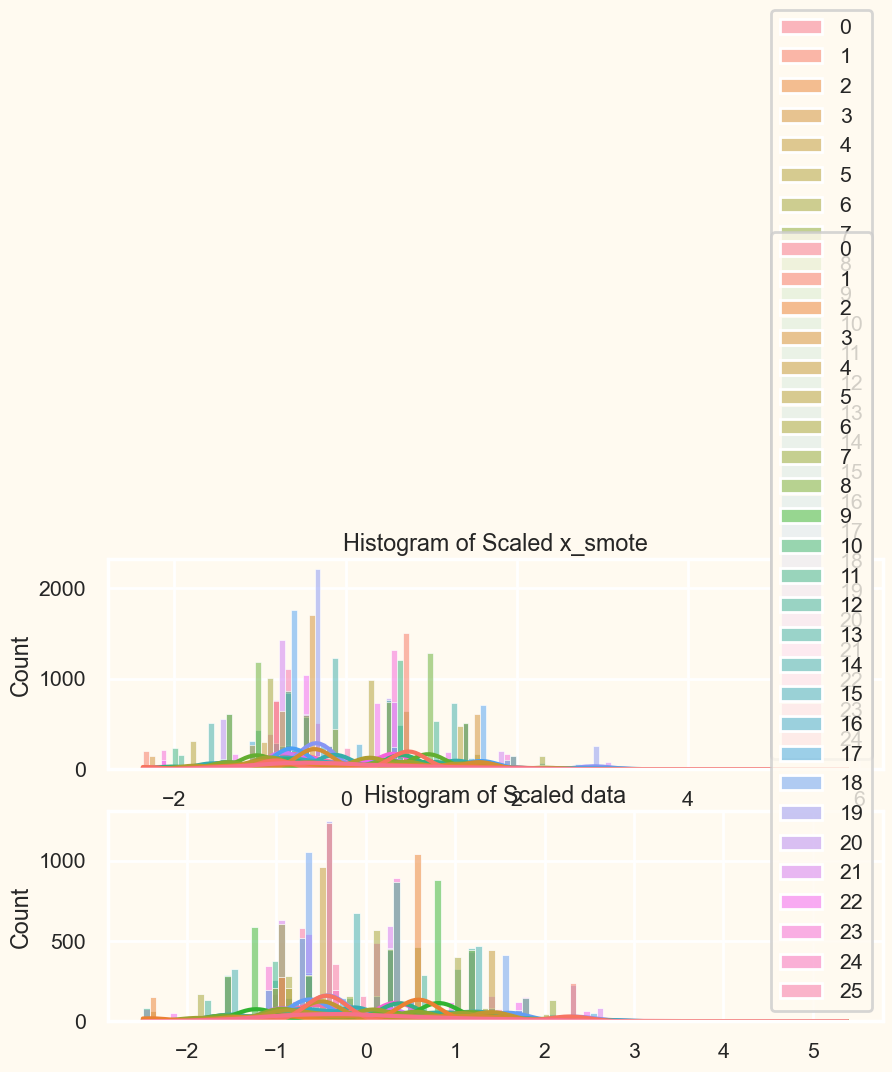

In [87]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
sns.histplot(x_scaled, kde=True)
plt.title('Histogram of Scaled x_smote')
plt.subplot(2, 1, 2)
sns.histplot(data_scaled, kde=True)
plt.title('Histogram of Scaled data')

plt.tight_layout()
plt.show()

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

In [70]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1972, 25) (1972, 1) (494, 25) (494, 1)


In [71]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_scaled, y_smote, test_size=0.2, random_state=42)

In [72]:
print(x_train1.shape, y_train1.shape, x_test1.shape, y_test1.shape)

(1972, 25) (1972, 1) (494, 25) (494, 1)


### Machine learning models- 


In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from scipy.stats import randint
from scipy.stats import uniform
from sklearn import metrics
from sklearn.metrics import *

In [74]:
training_score = []
testing_score = []
precission = []
recall = []
auc_score = []

In [75]:
def model_prediction(model):
    model.fit(x_train1,y_train1)
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)
    y_test_prob1 = model.predict_proba(x_test1)[:, 1]
    a = accuracy_score(y_train1,x_train_pred1)*100
    b = accuracy_score(y_test1,x_test_pred1)*100
    c = precision_score(y_test1,x_test_pred1)
    d = recall_score(y_test1,x_test_pred1)
    training_score.append(a)
    testing_score.append(b)
    precission.append(c)
    recall.append(d)
    
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",c)
    print(f"Recall Score of {model} model is:",d)
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test1,x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()
    y_pred_proba1 = model.predict_proba(x_test1)[:][:,1]
    fpr, tpr, thresholds = roc_curve(y_test1, y_pred_proba1)
    auc = roc_auc_score(y_test1, y_pred_proba1)

    plt.figure(figsize=(8, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
    plt.plot([0, 1], [0, 1], linestyle="--", color="black")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

Accuracy_Score of LogisticRegression() model on Training Data is: 82.7079107505071
Accuracy_Score of LogisticRegression() model on Testing Data is: 81.37651821862349

------------------------------------------------------------------------
Precision Score of LogisticRegression() model is: 0.8220338983050848
Recall Score of LogisticRegression() model is: 0.7950819672131147
Confusion Matrix of LogisticRegression() model is:


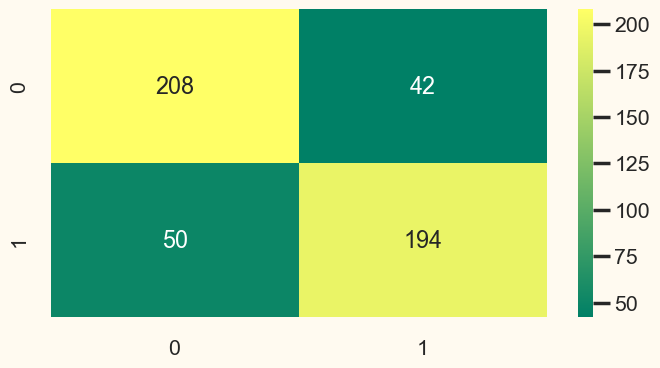

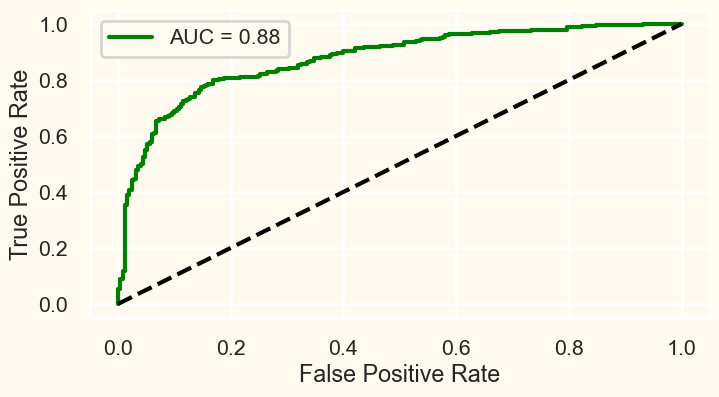

In [76]:
model_prediction(LogisticRegression())

In [77]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    y_test_prob = model.predict_proba(x_test)[:, 1]
    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    c = precision_score(y_test,x_test_pred)
    d = recall_score(y_test,x_test_pred)
    e = roc_auc_score(y_test, y_test_prob)
    training_score.append(a)
    testing_score.append(b)
    precission.append(c)
    recall.append(d)

    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",c)
    print(f"Recall Score of {model} model is:",d)
    print(f"Classification Report of {model} model is:")
    print(classification_report(y_test, model.predict(x_test)))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()
    print("\n------------------------------------------------------------------------")
    print(f"ROC - AUC Curve of {model} model is:")
    y_pred_proba = model.predict_proba(x_test)[:][:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(8, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
    plt.plot([0, 1], [0, 1], linestyle="--", color="black")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve",pad=20,fontweight="black")
    plt.legend()
    plt.show()

Accuracy_Score of RandomForestClassifier() model on Training Data is: 100.0
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 90.68825910931174

------------------------------------------------------------------------
Precision Score of RandomForestClassifier() model is: 0.9267241379310345
Recall Score of RandomForestClassifier() model is: 0.8811475409836066
Classification Report of RandomForestClassifier() model is:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       250
           1       0.93      0.88      0.90       244

    accuracy                           0.91       494
   macro avg       0.91      0.91      0.91       494
weighted avg       0.91      0.91      0.91       494


------------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier() model is:


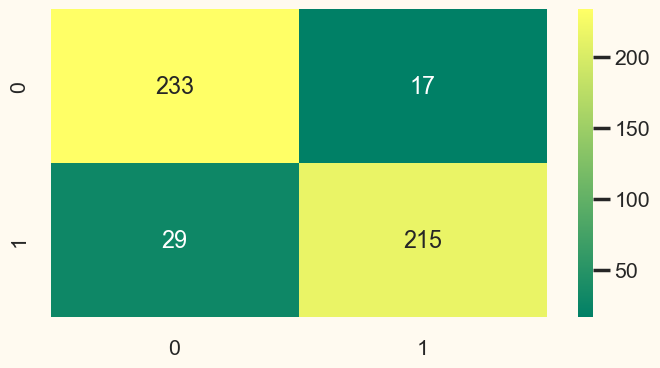


------------------------------------------------------------------------
ROC - AUC Curve of RandomForestClassifier() model is:


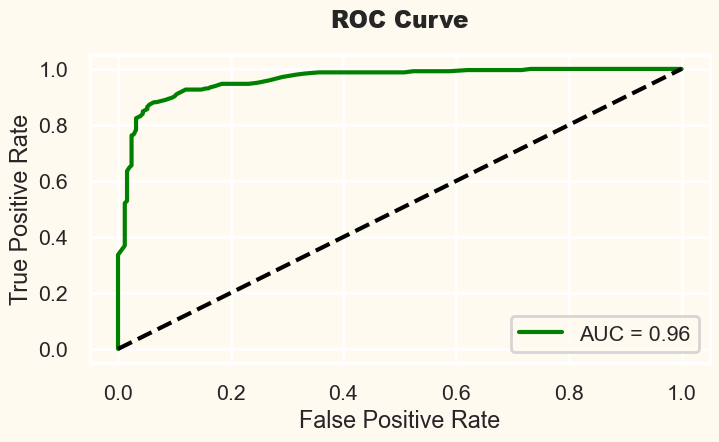

In [78]:
model_prediction(RandomForestClassifier())

Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) model on Training Data is: 100.0
Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, e

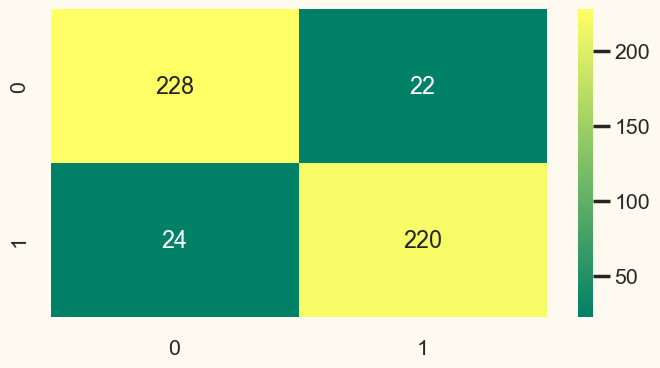


------------------------------------------------------------------------
ROC - AUC Curve of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) model is:


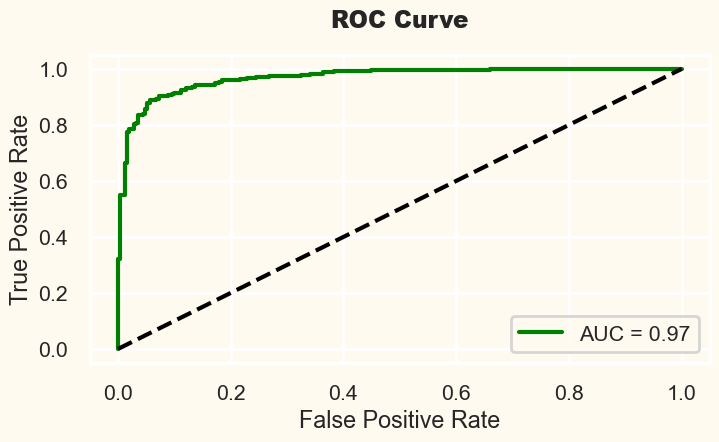

In [79]:
model_prediction(XGBClassifier())

In [80]:
models = ["Logistic Regression","Random Forest","XGBoost"]

In [81]:
df = pd.DataFrame({"Algorithms":models,
                   "Testing Score":testing_score,
                  "Precision": precission,
                  "Recall": recall,
                  })
df

,Algorithms,Testing Score,Precision,Recall
0,Logistic Regression,81.376518,0.822034,0.795082
1,Random Forest,90.688259,0.926724,0.881148
2,XGBoost,90.688259,0.909091,0.901639


### Random forest & XGBoost Model are having High Test Accuracy and AUC Score.

In [82]:
import statsmodels.api as sm

In [83]:
model = sm.Logit(y_train, x_train1).fit()

Optimization terminated successfully.
         Current function value: 0.392385
         Iterations 7


In [84]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1972
Model:                          Logit   Df Residuals:                     1947
Method:                           MLE   Df Model:                           24
Date:                Tue, 12 Dec 2023   Pseudo R-squ.:                  0.4339
Time:                        11:06:45   Log-Likelihood:                -773.78
converged:                       True   LL-Null:                       -1366.9
Covariance Type:            nonrobust   LLR p-value:                2.158e-235
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1867      0.081     -2.307      0.021      -0.345      -0.028
x2            -0.1074      0.066     -1.639      0.101      -0.236       0.021
x3            -0.1846      0.064     -2.906      0.004      -0.309      -0.060
x4            -0.3260      0.091     -3.585      0.000      -0.504      -0.148
x5             0.2752      0.066      4.143      0.000       0.145       0.405
x6            -0.3377      0.065     -5.170      0.000      -0.466      -0.210
x7            -0.0828      0.064     -1.284      0.199      -0.209       0.044
x8            -0.5831      0.069     -8.511      0.000      -0.717      -0.449
x9            -0.1781      0.065     -2.754      0.006      -0.305      -0.051
x10           -0.0940      0.064     -1.479      0.139      -0.219       0.031
x11           -0.7389      0.072    -10.208      0.000      -0.881      -0.597
x12            0.3272      0.090      3.634      0.000       0.151       0.504
x13           -0.6136      0.068     -9.064      0.000      -0.746      -0.481
x14           -0.1898      0.081     -2.345      0.019      -0.348      -0.031
x15           -0.3136      0.092     -3.395      0.001      -0.495      -0.133
x16            0.0124      0.065      0.189      0.850      -0.116       0.141
x17            0.2000      0.069      2.914      0.004       0.065       0.334
x18            0.4248      0.066      6.402      0.000       0.295       0.555
x19           -0.3056      0.067     -4.538      0.000      -0.438      -0.174
x20           -0.4217      0.066     -6.411      0.000      -0.551      -0.293
x21           -0.8698      0.090     -9.634      0.000      -1.047      -0.693
x22           -0.3398      0.065     -5.199      0.000      -0.468      -0.212
x23           -0.5205      0.068     -7.646      0.000      -0.654      -0.387
x24           -0.3303      0.103     -3.198      0.001      -0.533      -0.128
x25            0.2721      0.089      3.069      0.002       0.098       0.446
==============================================================================
"""

In [88]:
import numpy as np

predictions_prob = model.predict(x_test1)
predictions = np.where(predictions_prob > 0.5, 1, 0)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming y_test is your actual outcomes
accuracy = accuracy_score(y_test1, predictions)
precision = precision_score(y_test1, predictions)
recall = recall_score(y_test1, predictions)
f1 = f1_score(y_test1, predictions)
roc_auc = roc_auc_score(y_test1, predictions_prob)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")

Accuracy: 0.8137651821862348
Precision: 0.8220338983050848
Recall: 0.7950819672131147
F1 Score: 0.8083333333333333
ROC-AUC Score: 0.8756229508196721


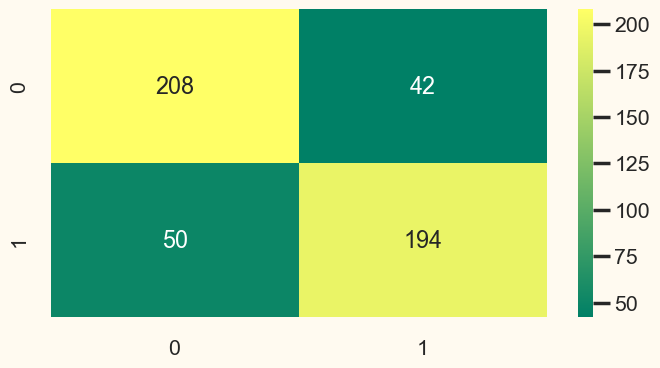

In [91]:
conf_matrix = confusion_matrix(y_test1, predictions)
plt.figure(figsize=(8,4))
sns.heatmap(conf_matrix,annot=True,fmt="g",cmap="summer")
plt.show()

### Hypothesis Testing


In [108]:
##Gender

hypothesis = 'x9 = 0'
test_result = model.t_test(hypothesis)
print(test_result)

                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.1781      0.065     -2.754      0.006      -0.305      -0.051


In [109]:
##Education:

hypothesis = 'x7 = 0'
test_result = model.t_test(hypothesis)
print(test_result)

                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.0828      0.064     -1.284      0.199      -0.209       0.044


In [110]:
## Job Satisfaction and Job Involvement
hypothesis = 'x13 - x11 = 0'
test_result = model.t_test(hypothesis)
print(test_result)

                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.1253      0.096      1.310      0.190      -0.062       0.313


In [111]:
## Training Time last year and performance training
hypothesis = 'x22 - x19 = 0'
test_result = model.t_test(hypothesis)
print(test_result)

                             Test for Constraints                             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -0.0342      0.093     -0.368      0.713      -0.216       0.148
